In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df_2015=pd.read_csv("/Users/macbook/Downloads/Final project/Season datasets/2015-2016.csv")
df_2016=pd.read_csv("/Users/macbook/Downloads/Final project/Season datasets/2016-2017.csv")
df_2017=pd.read_csv("/Users/macbook/Downloads/Final project/Season datasets/2017-2018.csv")
df_2018=pd.read_csv("/Users/macbook/Downloads/Final project/Season datasets/2018-2019.csv")
df_2019=pd.read_csv("/Users/macbook/Downloads/Final project/Season datasets/2019-2020.csv")
df_2020=pd.read_csv("/Users/macbook/Downloads/Final project/Season datasets/2020-2021.csv")
df_2021=pd.read_csv("/Users/macbook/Downloads/Final project/Season datasets/2021-2022.csv")
df_2022=pd.read_csv("/Users/macbook/Downloads/Final project/Season datasets/2022-2023.csv")
df_2023=pd.read_csv("/Users/macbook/Downloads/Final project/Season datasets/2023-2024_curr.csv")

In [3]:
def set_columns(season):
    #df=season[['Rk','Season','Team','Pts','Pts/MP','xG','xGA','Poss','Gls','Ast','PK','PKatt','CrdR','GA90','SoTA','Saves','CS','PKsv','PKm','Sh','SoT','Sh/90','G/Sh','G/SoT','Crs','OG']]
    df= season[['Team','Pts','Season','Rk','xG', 'xGA', 'Poss', 'Gls', 'Ast', 'Sh', 'SoT', 'GA90', 'Saves', 'CS', 'PKatt', 'CrdR','Pts/MP','Crs','PKwon']]
    return df
def heatmap(season):
    fig, ax = plt.subplots(figsize=(18,10))
    #return sns.heatmap(season.drop(['PKatt','Season','Team','PK','Pts/MP','Sh/90','G/SoT'],axis=1).corr(),annot=True,)
    return sns.heatmap(season.drop(['PKatt','Season','Team','Pts/MP','SoT'],axis=1).corr(),annot=True)

In [4]:
#dd_2015=set_columns(df_2015)
dd_2016=set_columns(df_2016)
dd_2017=set_columns(df_2017)
dd_2018=set_columns(df_2018)
dd_2019=set_columns(df_2019)
dd_2020=set_columns(df_2020)
dd_2021=set_columns(df_2021)
dd_2022=set_columns(df_2022)

In [5]:
Final_df=pd.concat([dd_2016,dd_2017,dd_2018,dd_2019,dd_2020,dd_2021,dd_2022])
Final_df.head()

,Team,Pts,Season,Rk,xG,xGA,Poss,Gls,Ast,Sh,SoT,GA90,Saves,CS,PKatt,CrdR,Pts/MP,Crs,PKwon
0,Chelsea,93,2016-17,1,61.80,28.62,55.1,83,53,582,205,0.87,72,16,4,0.0,2.45,697,4
1,Tottenham,86,2016-17,2,70.07,33.78,60.5,84,59,670,257,0.68,84,17,9,0.0,2.26,763,9
2,Manchester City,78,2016-17,3,79.85,29.61,65.0,75,54,633,215,1.03,66,12,9,0.0,2.05,810,9
3,Liverpool,76,2016-17,4,66.63,37.65,62.0,77,52,639,236,1.11,72,12,8,0.0,2.00,815,5
4,Arsenal,75,2016-17,5,63.58,47.07,58.9,73,55,568,201,1.16,123,13,6,0.0,1.97,701,4


<Axes: >

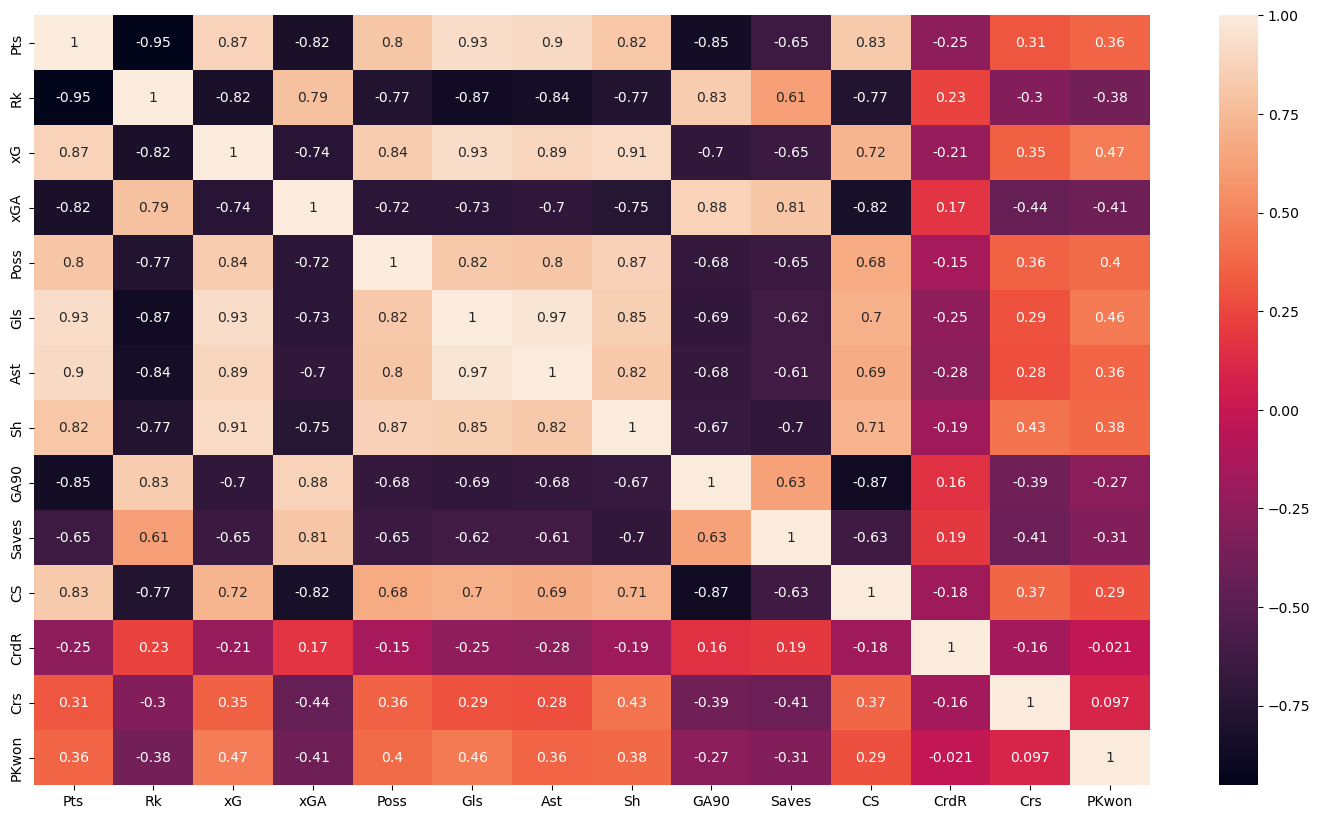

In [6]:
heatmap(Final_df)

**DATA CLEANING..**

In [199]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 19
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    140 non-null    object 
 1   Pts     140 non-null    int64  
 2   Season  140 non-null    object 
 3   Rk      140 non-null    int64  
 4   xG      140 non-null    float64
 5   xGA     140 non-null    float64
 6   Poss    140 non-null    float64
 7   Gls     140 non-null    int64  
 8   Ast     140 non-null    int64  
 9   Sh      140 non-null    int64  
 10  SoT     140 non-null    int64  
 11  GA90    140 non-null    float64
 12  Saves   140 non-null    int64  
 13  CS      140 non-null    int64  
 14  PKatt   140 non-null    int64  
 15  CrdR    120 non-null    float64
 16  Pts/MP  140 non-null    float64
 17  Crs     140 non-null    int64  
 18  PKwon   140 non-null    int64  
dtypes: float64(6), int64(11), object(2)
memory usage: 21.9+ KB


In [200]:
Final_df.describe()

,Pts,Rk,xG,xGA,Poss,Gls,Ast,Sh,SoT,GA90,Saves,CS,PKatt,CrdR,Pts/MP,Crs,PKwon
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,120.000000,140.000000,140.000000,140.000000
mean,52.685714,10.500000,50.518786,50.520857,50.007857,50.864286,35.942857,471.464286,157.092857,1.384786,109.235714,10.692857,5.057143,1.925000,1.386429,697.907143,4.150000
std,18.523982,5.786986,13.401528,10.919365,7.690048,17.979289,14.058343,90.165189,38.486828,0.354895,23.170811,3.808163,2.763512,1.496003,0.487459,94.231683,2.660462
min,16.000000,1.000000,28.800000,23.800000,35.400000,19.000000,11.000000,319.000000,92.000000,0.580000,58.000000,4.000000,0.000000,0.000000,0.420000,473.000000,0.000000
25%,40.000000,5.750000,39.850000,43.545000,44.100000,37.750000,25.750000,403.750000,129.250000,1.160000,94.000000,8.000000,3.000000,1.000000,1.050000,634.500000,2.000000
50%,49.000000,10.500000,47.885000,51.050000,48.800000,47.500000,33.000000,451.500000,145.000000,1.390000,110.500000,10.000000,4.500000,2.000000,1.290000,695.000000,4.000000
75%,66.000000,15.250000,57.142500,58.375000,54.700000,62.250000,45.250000,515.750000,185.250000,1.660000,124.000000,13.000000,7.000000,3.000000,1.740000,764.250000,6.000000
max,100.000000,20.000000,92.000000,75.500000,71.000000,103.000000,85.000000,735.000000,257.000000,2.210000,179.000000,21.000000,14.000000,6.000000,2.630000,960.000000,12.000000


In [201]:
Final_df.isnull().sum()

Team       0
Pts        0
Season     0
Rk         0
xG         0
xGA        0
Poss       0
Gls        0
Ast        0
Sh         0
SoT        0
GA90       0
Saves      0
CS         0
PKatt      0
CrdR      20
Pts/MP     0
Crs        0
PKwon      0
dtype: int64

In [202]:
Final_df.duplicated().sum ()

0

**IMPORTANT VISUALIZATIONS**

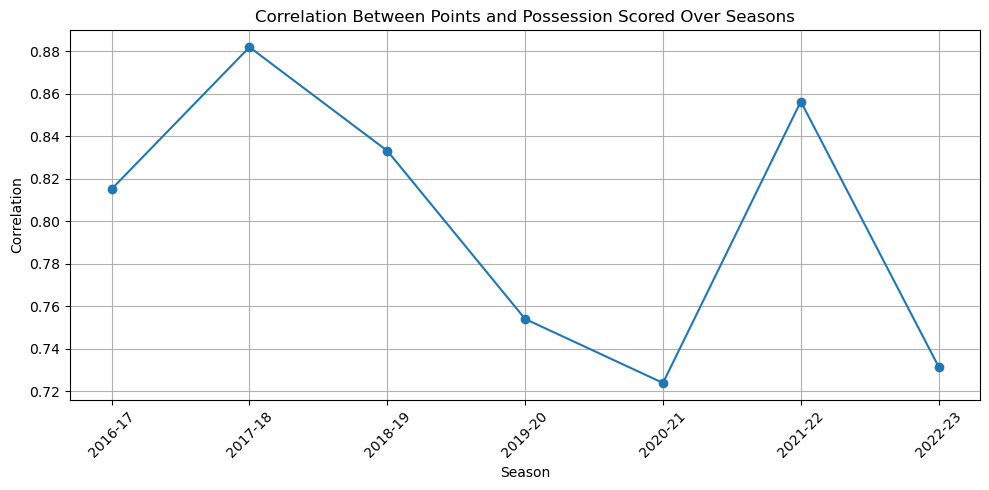

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the correlation between 'Pts' and 'Gls' for each season
correlation_over_time = Final_df.groupby('Season').apply(lambda x: x['Pts'].corr(x['Poss']))

# Reset index to turn the series into a DataFrame
correlation_over_time = correlation_over_time.reset_index(name='Correlation')

# Sort the DataFrame by 'Season' to ensure the line chart follows chronological order
correlation_over_time.sort_values('Season', inplace=True)

# Now plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(correlation_over_time['Season'], correlation_over_time['Correlation'], marker='o')
plt.title('Correlation Between Points and Possession Scored Over Seasons')
plt.xlabel('Season')
plt.ylabel('Correlation')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust the layout
plt.show()


In [204]:
print(Final_df['Team'].unique())


['\xa0Chelsea' '\xa0Tottenham' '\xa0Manchester City' '\xa0Liverpool'
 '\xa0Arsenal' '\xa0Manchester Utd' '\xa0Everton' '\xa0Southampton'
 '\xa0Bournemouth' '\xa0West Brom' '\xa0West Ham' '\xa0Leicester City'
 '\xa0Stoke City' '\xa0Crystal Palace' '\xa0Swansea City' '\xa0Burnley'
 '\xa0Watford' '\xa0Hull City' '\xa0Middlesbrough' '\xa0Sunderland'
 '\xa0Newcastle Utd' '\xa0Brighton' '\xa0Huddersfield' '\xa0Wolves'
 '\xa0Cardiff City' '\xa0Fulham' '\xa0Sheffield Utd' '\xa0Aston Villa'
 '\xa0Norwich City' '\xa0Leeds United' '\xa0Brentford'
 "\xa0Nott'ham Forest"]


/Users/macbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/macbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


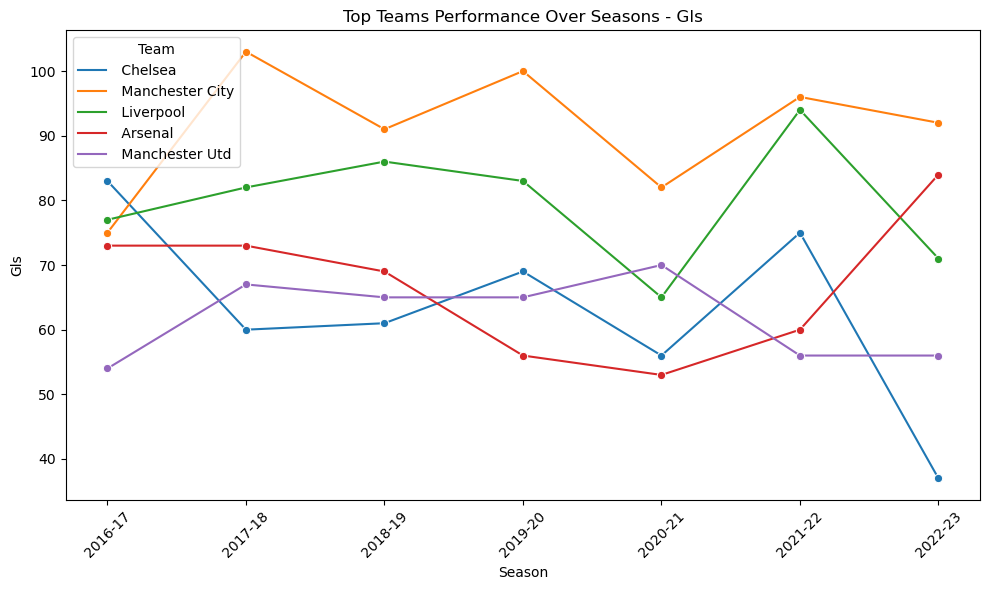

/Users/macbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/macbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


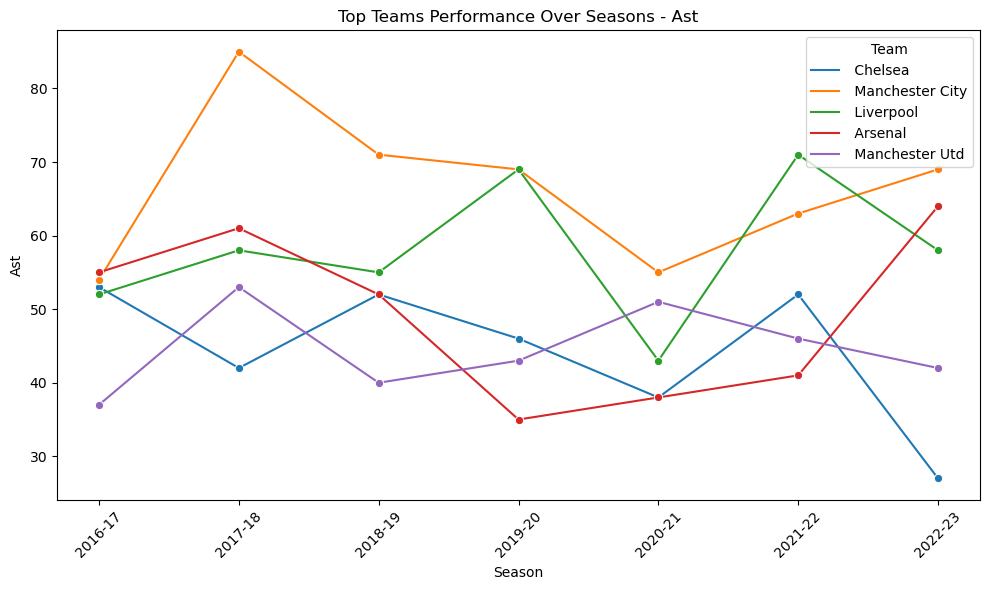

/Users/macbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/macbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


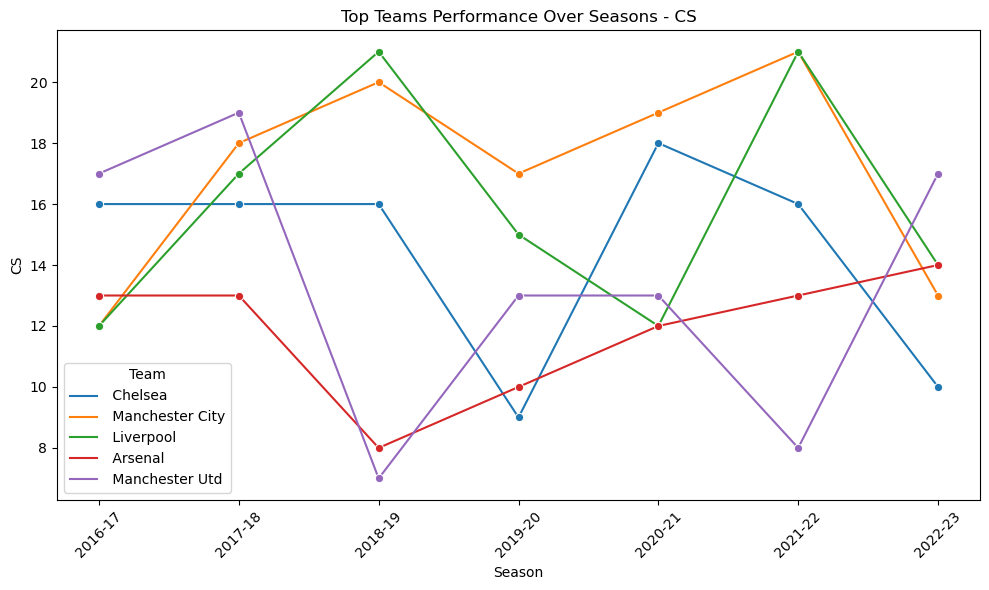

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ... (assuming df is your DataFrame with the necessary data)

# Define top teams
top_teams = ['\xa0Manchester City', '\xa0Liverpool', '\xa0Arsenal','\xa0Manchester Utd','\xa0Chelsea']  # Replace with actual top teams

# Make sure there are actual rows for these teams in the DataFrame
df_top_teams = Final_df[Final_df['Team'].isin(top_teams)]

# Now, plotting for each metric. Seaborn will handle the legend automatically.
for metric in ['Gls', 'Ast', 'CS']:
    plt.figure(figsize=(10, 6))  # Set the figure size for better readability
    sns.lineplot(data=df_top_teams, x='Season', y=metric, hue='Team', marker='o')
    plt.title(f'Top Teams Performance Over Seasons - {metric}')
    plt.ylabel(metric)
    plt.xlabel('Season')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    # No need to explicitly define legend labels, seaborn handles it based on 'hue'
    plt.legend(title='Team')
    plt.tight_layout()  # Adjust the layout
    plt.show()


## Analysis of Top Football Teams' Performance Over Seasons

The provided line charts illustrate the performance trends of top football teams over multiple seasons in the Premier League, focusing on three key metrics: Goals Scored (`Gls`), Assists (`Ast`), and Clean Sheets (`CS`).

### Goals Scored (Gls)
- The `Gls` chart traces the offensive prowess of each team, revealing which seasons saw peak scoring performance.
- Notable trends can be observed where certain teams show consistency in their attacking output, while others exhibit fluctuations.

### Assists (Ast)
- The `Ast` chart highlights the collaborative success of the teams, indicating how effectively players have set up their teammates to score.
- The trends may correlate with the `Gls` chart, suggesting a direct relationship between assists and goals scored in successful campaigns.

### Clean Sheets (CS)
- The `CS` chart reflects defensive strength by showing the number of matches where teams conceded no goals.
- Defensive stability or vulnerability across seasons can be inferred from this chart, indicating periods of robust backlines or potential weaknesses.

### Key Takeaways
- Consistently high-performing teams across these metrics often correlate with successful season outcomes, such as winning the league or securing top positions.
- Teams with significant variation in these metrics from season to season may have undergone changes in management, player roster, or encountered challenges such as injuries.
- The analysis of these trends helps in understanding the tactical and strategic shifts in teams' gameplay over the years, underlining the elements contributing to their success or struggle in different seasons.

These insights can serve as a basis for deeper analysis into the factors influencing top teams' performance and the dynamic nature of competitive league standings.


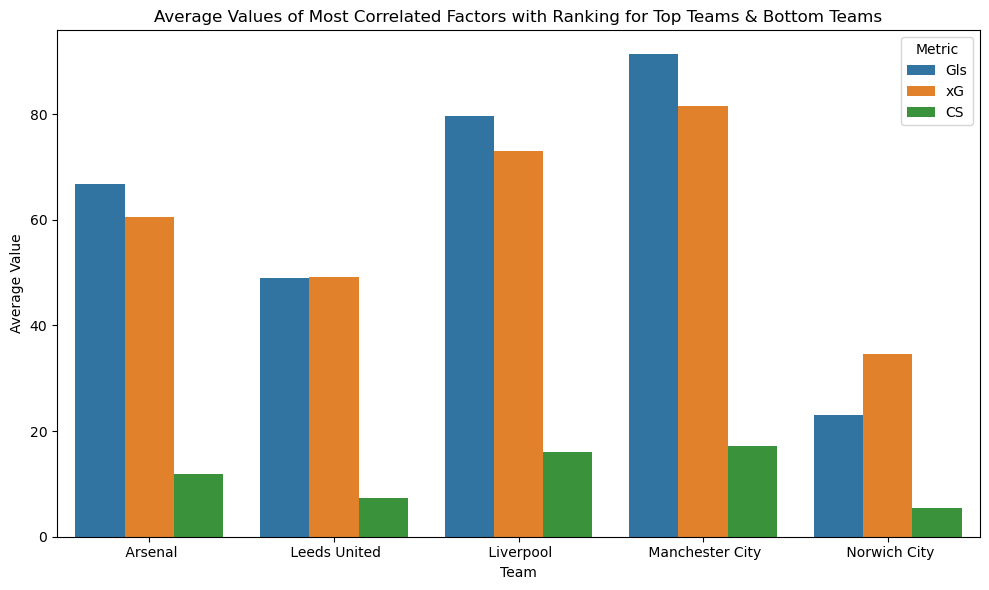

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Final_df is your DataFrame with the necessary data
# Make sure the team names match exactly what's in your DataFrame
#top_teams = ['Manchester City', 'Liverpool', 'Arsenal']
top_teams1 = ['\xa0Manchester City', '\xa0Liverpool', '\xa0Arsenal','\xa0Leeds United','\xa0Norwich City']
# Filtering the DataFrame for top teams
df_top_teams = Final_df[Final_df['Team'].isin(top_teams1)]

# Calculating the mean for the metrics for each top team
top_teams_metrics = df_top_teams.groupby('Team')[['Gls', 'xG', 'CS']].mean().reset_index()


# Melting the DataFrame for easier plotting with seaborn
top_teams_metrics_melted = top_teams_metrics.melt(id_vars='Team', var_name='Metric', value_name='Average')

# Plotting using seaborn for grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_teams_metrics_melted, x='Team', y='Average', hue='Metric')
plt.title('Average Values of Most Correlated Factors with Ranking for Top Teams & Bottom Teams')
plt.xlabel('Team')
plt.ylabel('Average Value')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


## Top Football Teams Performance Metrics

The visual representation above is a grouped bar chart showing average statistical performance metrics for select top football teams. Each cluster of bars represents a distinct team, and the bars within a cluster are color-coded to differentiate between the three key metrics evaluated:

- **Goals Scored (`Gls`)**: Represents the average number of goals a team scores. It's a direct indicator of a team's offensive strength.
- **Expected Goals (`xG`)**: A metric that estimates the number of goals a team should have scored, based on the quality of shots taken. It gives an insight into the quality of a team's scoring opportunities.
- **Clean Sheets (`CS`)**: This metric counts the number of games where the team has not conceded any goals, showcasing defensive prowess.

### Insights from the Chart:

- **Across the Board**: By examining the bars' heights within each team's group, we can infer which aspect of the game—offense or defense—each team excels in. A taller 'Goals Scored' bar, for instance, points to a strong offensive team.
- **Offensive Comparison**: A comparison of the 'Goals Scored' bars across teams highlights which team has the most potent attack.
- **Defensive Comparison**: Similarly, by comparing the 'Clean Sheets' bars, we can determine which team has the strongest defense.
- **Expected vs. Actual Goals**: The relationship between 'Expected Goals' and 'Goals Scored' can indicate efficiency in front of goal. A team whose 'Goals Scored' exceeds 'Expected Goals' is performing above expectation.

This graph serves as a concise overview of team performance, allowing for both intra-team and inter-team comparisons across offensive and defensive statistics.


/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


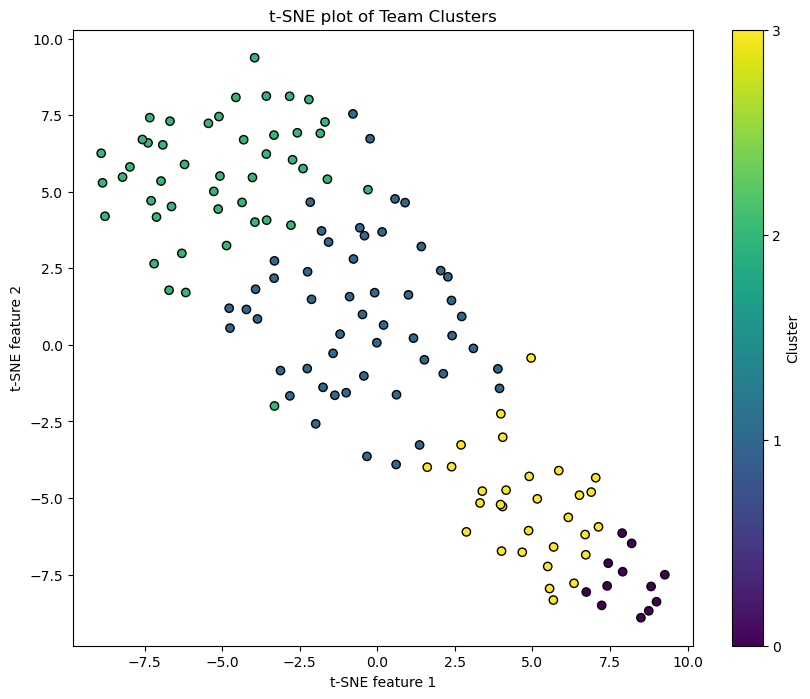

Cluster 0: ['\xa0Tottenham', '\xa0Manchester City', '\xa0Liverpool']
Cluster 1: ['\xa0Bournemouth', '\xa0West Ham', '\xa0Leicester City', '\xa0Stoke City', '\xa0Crystal Palace', '\xa0Swansea City', '\xa0Watford', '\xa0Southampton', '\xa0Arsenal', '\xa0Wolves', '\xa0Everton', '\xa0Newcastle Utd', '\xa0Tottenham', '\xa0Sheffield Utd', '\xa0Burnley', '\xa0Brighton', '\xa0Aston Villa', '\xa0Manchester Utd', '\xa0Brentford', '\xa0Fulham', '\xa0Chelsea']
Cluster 2: ['\xa0West Brom', '\xa0Burnley', '\xa0Watford', '\xa0Hull City', '\xa0Middlesbrough', '\xa0Sunderland', '\xa0Everton', '\xa0Newcastle Utd', '\xa0West Ham', '\xa0Brighton', '\xa0Huddersfield', '\xa0Swansea City', '\xa0Stoke City', '\xa0Cardiff City', '\xa0Fulham', '\xa0Crystal Palace', '\xa0Bournemouth', '\xa0Norwich City', '\xa0Sheffield Utd', '\xa0Wolves', '\xa0Leeds United', "\xa0Nott'ham Forest", '\xa0Leicester City', '\xa0Southampton']
Cluster 3: ['\xa0Chelsea', '\xa0Liverpool', '\xa0Arsenal', '\xa0Manchester Utd', '\xa0Everto

In [229]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a 'Team' column along with the metrics columns.

# Select the metrics columns for clustering
metrics_columns = ['Gls', 'Ast', 'xG', 'xGA', 'Poss', 'CS', 'Sh', 'SoT', 'Crs']
X = Final_df[metrics_columns]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as appropriate
clusters = kmeans.fit_predict(X_scaled)

# Assign the cluster labels to the original DataFrame
Final_df['Cluster'] = clusters

# Reduce dimensions with t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a scatter plot with the t-SNE components and color by cluster
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Final_df['Cluster'], cmap='viridis', marker='o', edgecolor='black')
plt.colorbar(ticks=range(kmeans.n_clusters), label='Cluster')
plt.title('t-SNE plot of Team Clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

# Display which teams are in which cluster uniquely
unique_teams_in_clusters = Final_df[['Team', 'Cluster']].drop_duplicates()
for cluster_num in range(kmeans.n_clusters):
    teams_in_cluster = unique_teams_in_clusters[unique_teams_in_clusters['Cluster'] == cluster_num]['Team'].tolist()
    print(f"Cluster {cluster_num}: {teams_in_cluster}")



## Clustering Analysis of Premier League Teams

A t-SNE visualization and KMeans clustering have been conducted to classify Premier League teams into distinct groups based on their performance metrics. The clusters identified reveal patterns and similarities among teams that may not be evident from traditional league standings.

### Cluster Composition:

- **Cluster 0**: Characterized by teams that often find themselves in the middle or lower end of the league table, such as Stoke City, Burnley, Watford, and others. This cluster might represent teams with defensive playing styles or those that lack the financial resources of the top-tier clubs.

- **Cluster 1**: Comprises top-tier teams like Chelsea, Tottenham, Manchester City, Liverpool, and Arsenal. Teams in this cluster are usually associated with strong financial backing, high-quality squads, and consistently high performance in both domestic and European competitions.

- **Cluster 2**: A mix of mid-table teams such as Southampton, West Ham, and Everton, alongside occasional top performers like Tottenham and Arsenal. This suggests a transitional cluster where teams have the potential to challenge for higher positions but may lack consistency.

- **Cluster 3**: Includes a combination of elite teams such as Manchester Utd, Chelsea, and Liverpool, along with other competitive sides like Everton and Leicester City. The presence of top teams in this cluster alongside less dominant ones might indicate that in certain seasons, these less dominant teams punched above their weight, performing closer to top-tier standards.

### Insights:

- **Strategic Similarities**: Teams within the same cluster may share similar tactical approaches, budget ranges, or player quality levels. For example, teams in Cluster 1 are likely to adopt aggressive, attacking tactics supported by significant investment in star players.

- **Potential Anomalies**: The presence of traditionally strong teams in clusters with typically mid-table teams (e.g., Arsenal appearing in multiple clusters) may indicate seasons of underperformance or transition for such clubs.

- **Competitive Dynamics**: The clustering underscores the competitive dynamics of the Premier League, where even teams outside the traditional 'top six' can exhibit seasons of high performance.

- **Financial and Managerial Impact**: Clusters may also reflect the impact of financial investment and managerial effectiveness, with Cluster 1 teams usually having higher budgets and renowned managers, which may correlate with their success.

### Conclusion:

The clustering analysis provides a nuanced understanding of the league's structure beyond mere league positions. It offers valuable insights into how teams with similar resources and strategies group together, which can be crucial for comparative analysis and strategic planning.



Mean Squared Error: 35.74841937323016
R-squared: 0.8787198082633575


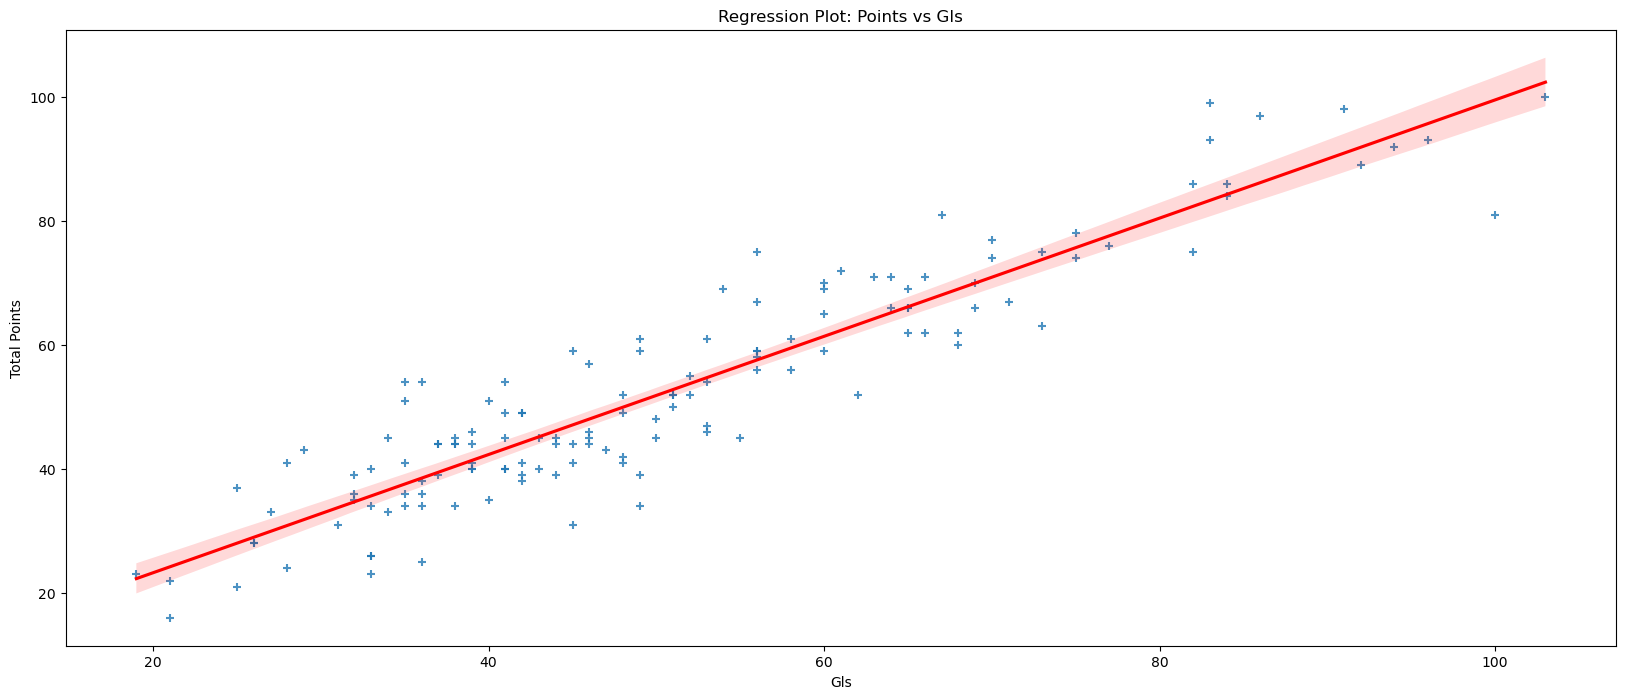

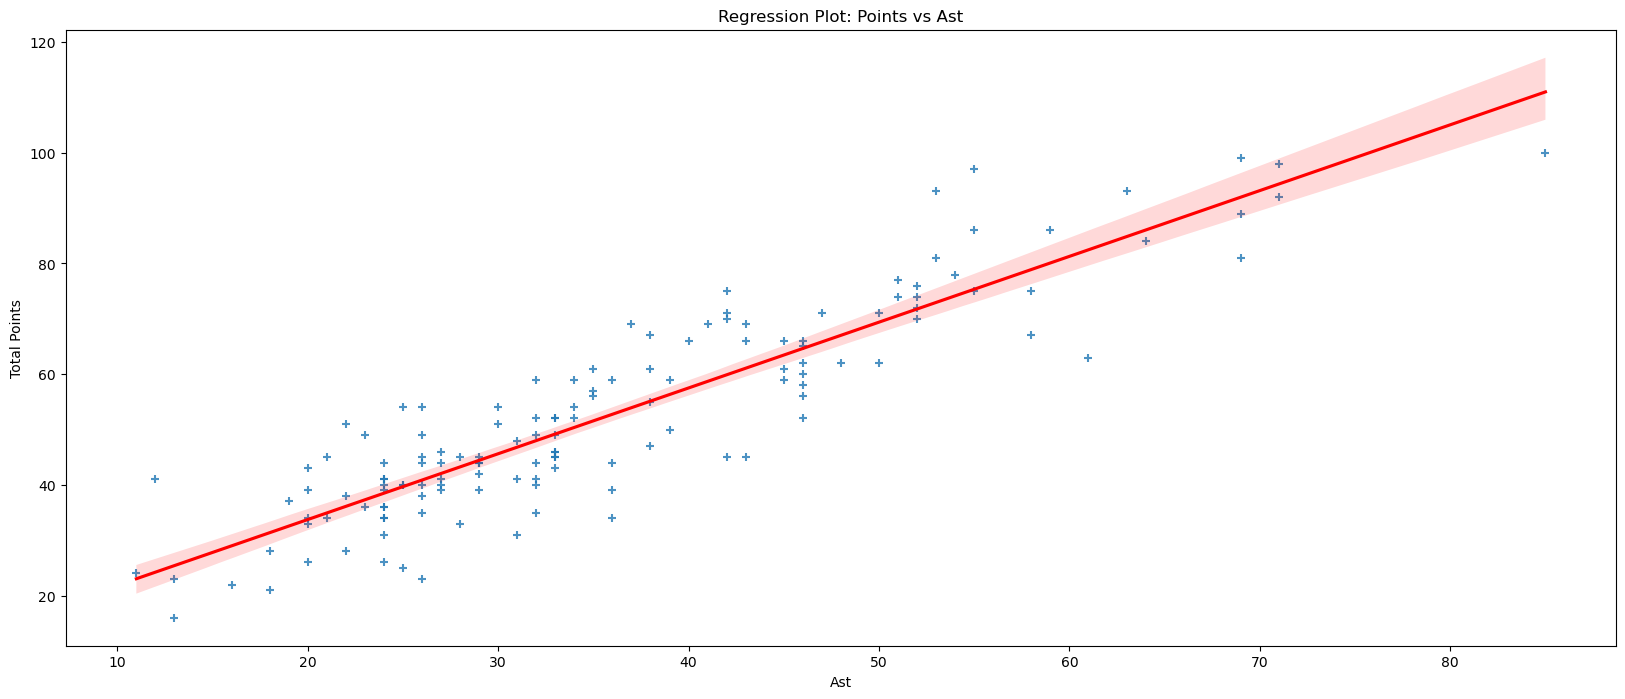

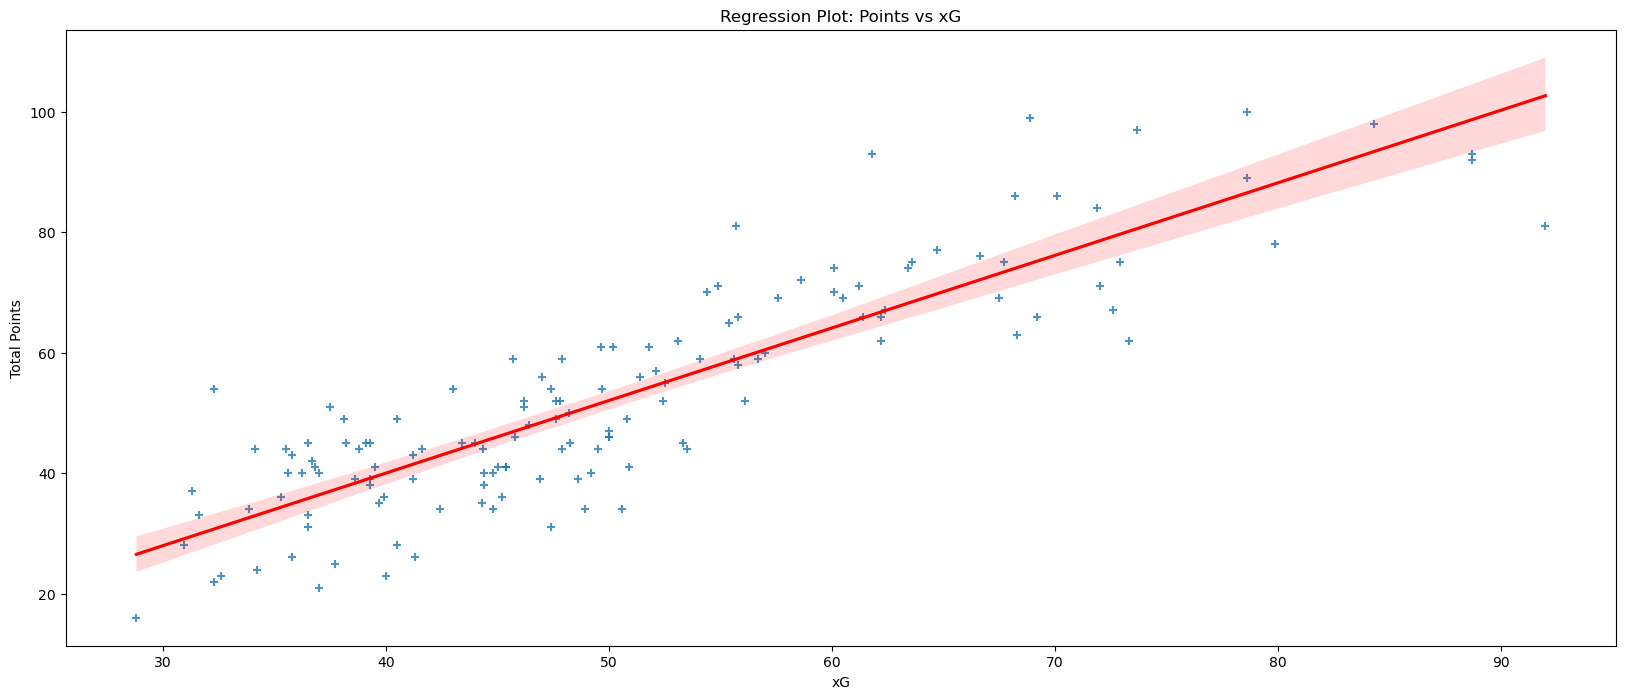

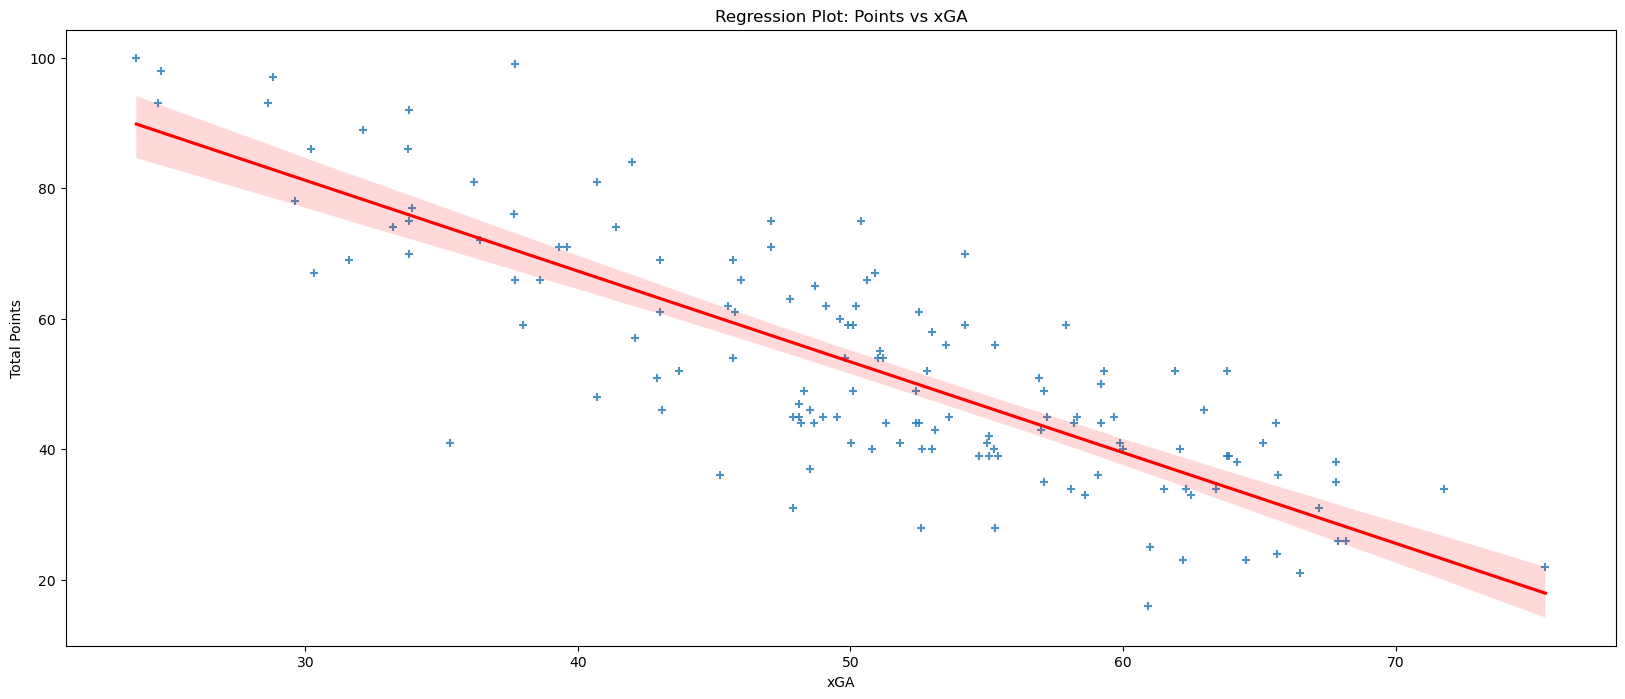

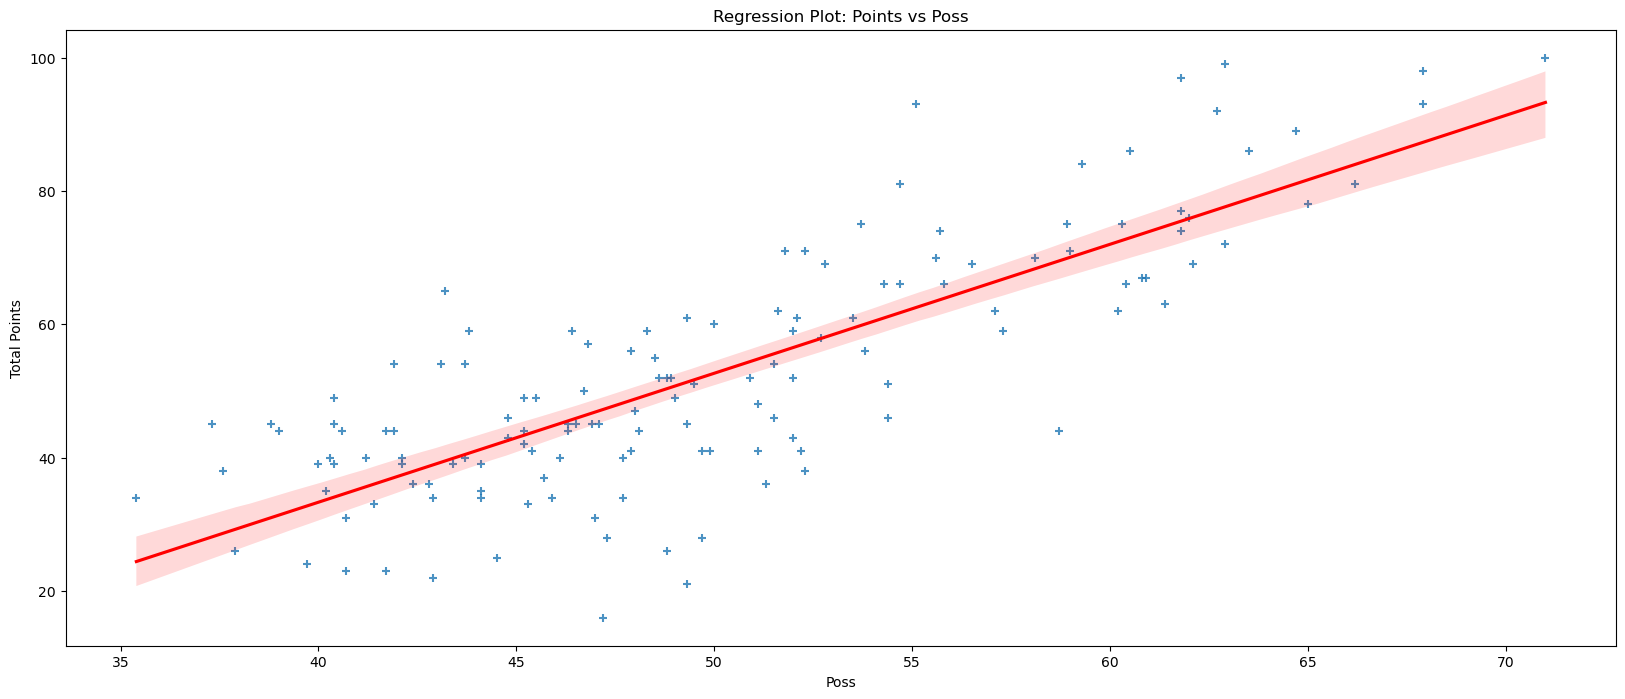

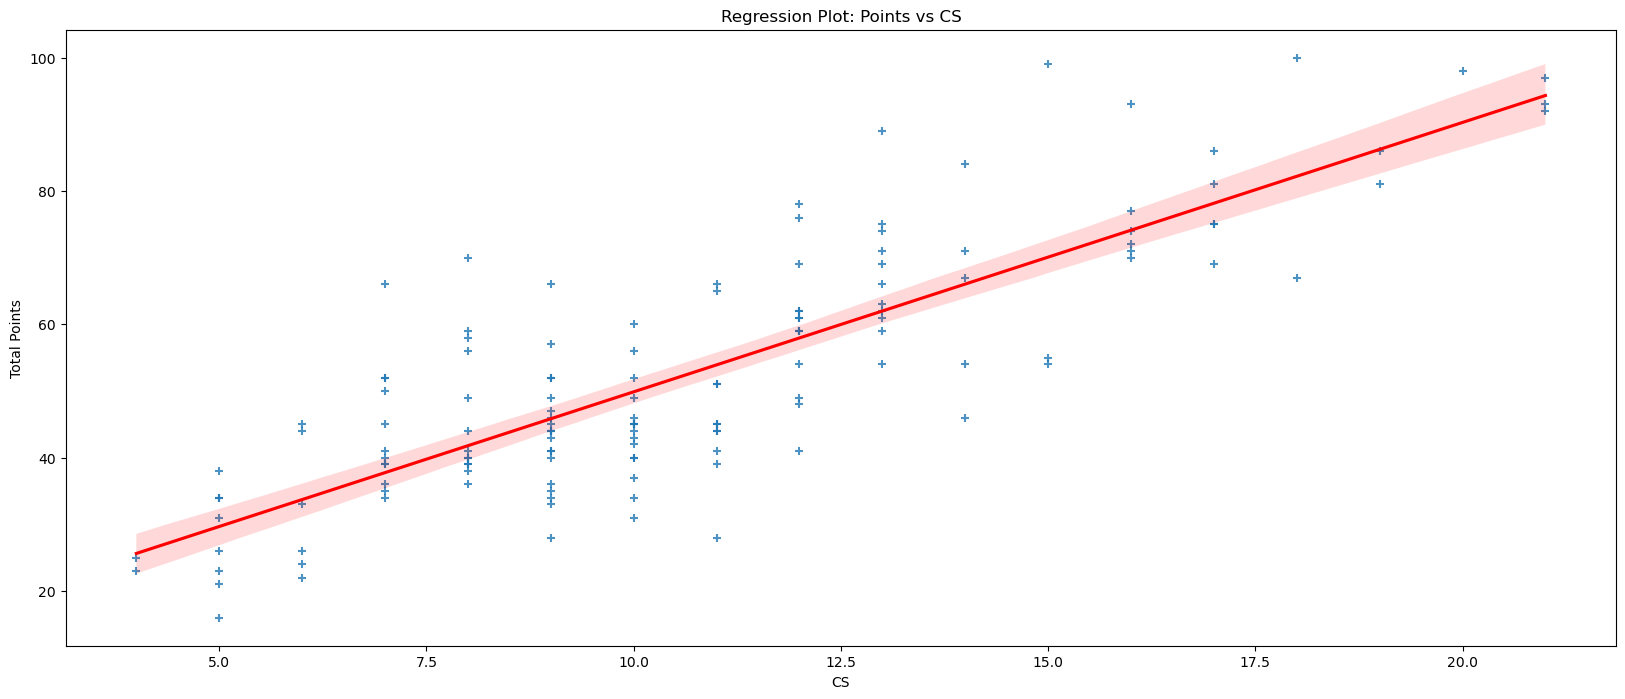

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a 'Pts' column for total points and other metrics columns.

# Select the features (metrics) that will be used to predict 'Pts'
feature_columns = ['Gls', 'Ast', 'xG', 'xGA', 'Poss', 'CS']  # Update with the metrics you want to include
X = Final_df[feature_columns]
y = Final_df['Pts']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.fit(X_train, y_train).predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting regression plots for each feature against the target
for feature in feature_columns:
    sns.regplot(x=Final_df[feature], y=Final_df['Pts'], data=Final_df, marker='+', line_kws={"color": "red"})
    plt.title(f'Regression Plot: Points vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Total Points')
    plt.show()


In [ ]:


# We want to sort teams by 'CrdR' and 'OG' in descending order and then take the top 5
top_team11 = Final_df.sort_values(by=['GA90'], ascending=False).head(5)
top_team22 = Final_df.sort_values(by=['GA90'], ascending=True).head(5)
# Display the top 5 teams
top_team11[['Season','Rk','Team','GA90','Pts']]
top_team22[['Season','Rk','Team','GA90','Pts']]
#top_team22[['Season','Rk','Team','CrdR','OG','CS','Pts']]



,Season,Rk,Team,GA90,Pts
1,2018-19,2,Liverpool,0.58,97
0,2018-19,1,Manchester City,0.61,98
1,2016-17,2,Tottenham,0.68,86
0,2021-22,1,Manchester City,0.68,93
1,2021-22,2,Liverpool,0.68,92


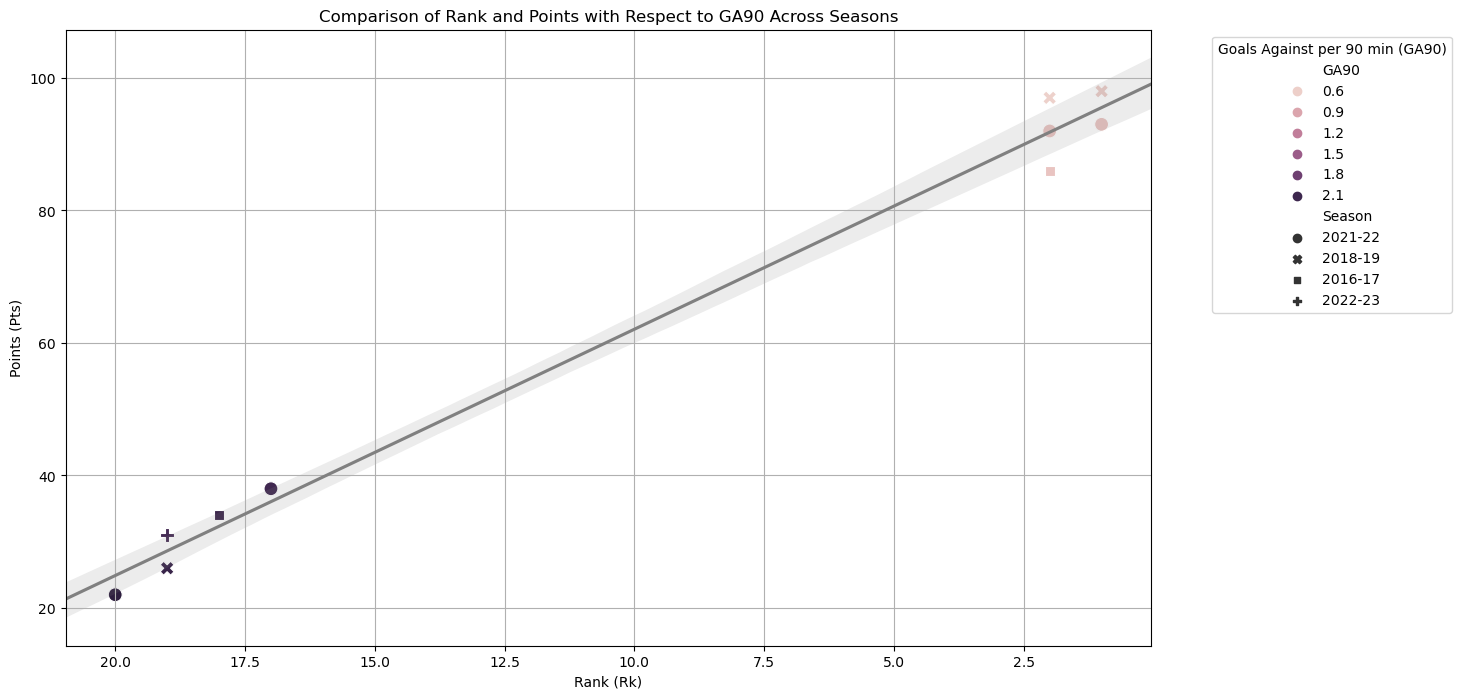

In [ ]:


# Combine both dataframes for plotting
combined_df = pd.concat([top_team11, top_team22]).reset_index(drop=True)

# Create a scatter plot with a hue based on 'GA90' values
plt.figure(figsize=(14, 8))
sns.scatterplot(data=combined_df, x='Rk', y='Pts', hue='GA90', style='Season', s=100)

# Add a trendline for visual aid
sns.regplot(data=combined_df, x='Rk', y='Pts', scatter=False, truncate=False, color='gray')

# Customizing the plot
plt.title('Comparison of Rank and Points with Respect to GA90 Across Seasons')
plt.xlabel('Rank (Rk)')
plt.ylabel('Points (Pts)')
plt.gca().invert_xaxis()  # Inverting x-axis to show higher rank (1st place) to the left
plt.legend(title='Goals Against per 90 min (GA90)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.show()



**Model Trianing**

In [13]:
X=Final_df.drop(['Pts','Season','Team','Pts/MP','Rk'],axis=1)
y=Final_df['Pts']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.columns.tolist())

['xG', 'xGA', 'Poss', 'Gls', 'Ast', 'Sh', 'SoT', 'GA90', 'Saves', 'CS', 'PKatt', 'CrdR', 'Crs', 'PKwon']


In [240]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = Final_df.drop(['Pts', 'Season', 'Team', 'Pts/MP','Rk'], axis=1)
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)
y = Final_df['Pts']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.2, random_state=42)




In [241]:
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)
#cb  = CatBoostRegressor(learning_rate =.07, max_depth =7, verbose=0)

regressors = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor',xgb)]

In [242]:
regressor_names=[]
accuracies=[]
mses=[]
for regressor_name, regressor in regressors:
    regressor_names.append(regressor_name)
    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    accuracies.append(accuracy)
    mse_error=mean_squared_error(y_test,y_pred)
    mses.append(mse_error)
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    print('{:s} : {:.0f}'.format(regressor_name, mse_error))
    #plt.rcParams["figure.figsize"] = (20,8)
    #plt.bar(regressor_name,accuracy)


K Nearest Neighbours : 55 %
K Nearest Neighbours : 132
Decision Tree : 77 %
Decision Tree : 69


Random Forest : 89 %
Random Forest : 34
AdaBoost : 88 %
AdaBoost : 34
Gradient Boosting Regressor : 87 %
Gradient Boosting Regressor : 39
XGBRegressor : 90 %
XGBRegressor : 29


In [294]:
# Assuming 'rf' is your trained RandomForestRegressor model
feature_importances = rf.feature_importances_

# Get the feature names from your dataset
feature_names = X_train.columns

# Create a dictionary of feature names and their importance scores
importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features by importance
sorted_importances = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

# Now you can print out the sorted importances
for feature, importance in sorted_importances:
    print(f"{feature}: Importance Score = {importance}")


Gls: Importance Score = 0.3589645318800295
xG: Importance Score = 0.2629638945777589
Ast: Importance Score = 0.09244082946239013
GA90: Importance Score = 0.08267727059038174
Poss: Importance Score = 0.057848115095042375
SoT: Importance Score = 0.048522869384369595
xGA: Importance Score = 0.030248104069774063
CS: Importance Score = 0.022839815791774715
Sh: Importance Score = 0.020113335125258064
Saves: Importance Score = 0.007444567215191219
Crs: Importance Score = 0.004818643191483949
PKwon: Importance Score = 0.004778243974511715
PKatt: Importance Score = 0.0039963940234139395
CrdR: Importance Score = 0.0023433856186200136


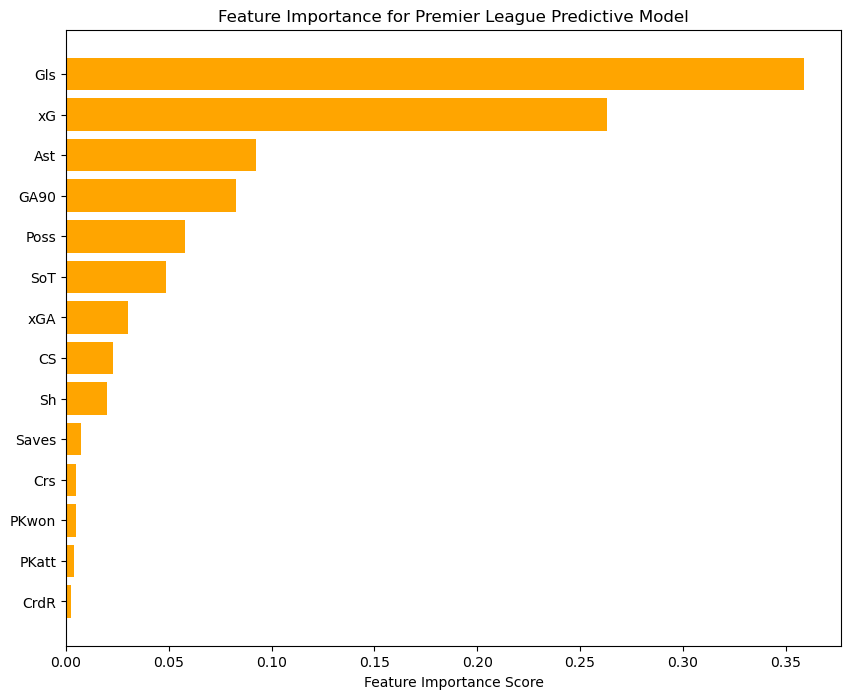

In [297]:


# Sort features by absolute value of importance to display them from highest to lowest
sorted_features = sorted(importance_dict.items(), key=lambda item: np.abs(item[1]), reverse=True)
features, importances = zip(*sorted_features)

# Create horizontal bar plot
plt.figure(figsize=(10, 8))
bars = plt.barh(features, importances, color='Orange')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance for Premier League Predictive Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.axvline(x=0, color='black', linewidth=0.5)  # Add a line to distinguish positive and negative values
plt.show()


K Nearest Neighbours - Accuracy: 55.2%, MSE: 131.91015625
Decision Tree - Accuracy: 80.7%, MSE: 56.92600537153081
Random Forest - Accuracy: 87.7%, MSE: 36.24679999999999
AdaBoost - Accuracy: 88.4%, MSE: 34.29304239661978
Gradient Boosting Regressor - Accuracy: 86.8%, MSE: 38.85299310627054
XGBRegressor - Accuracy: 90.2%, MSE: 28.91371353045101


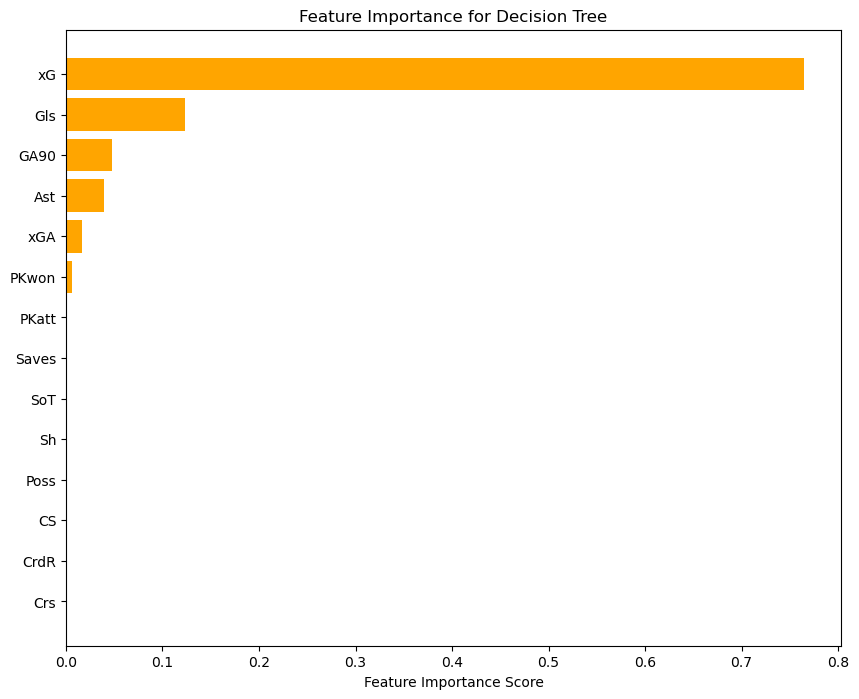

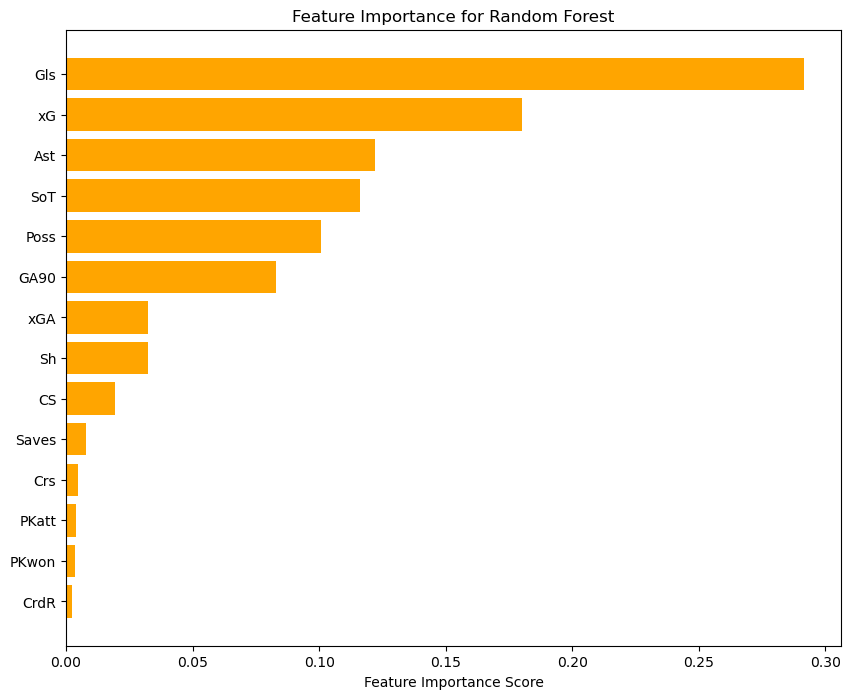

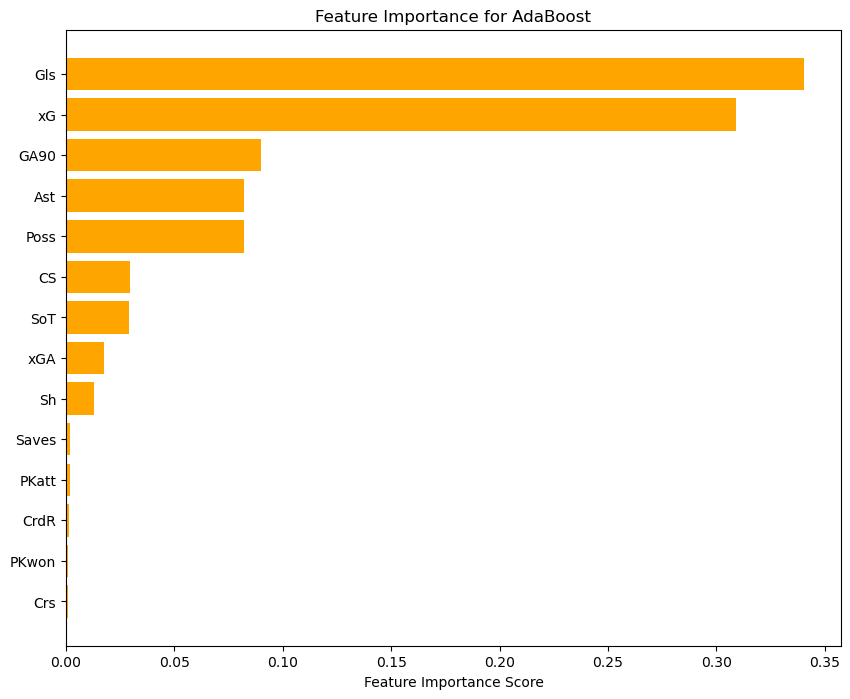

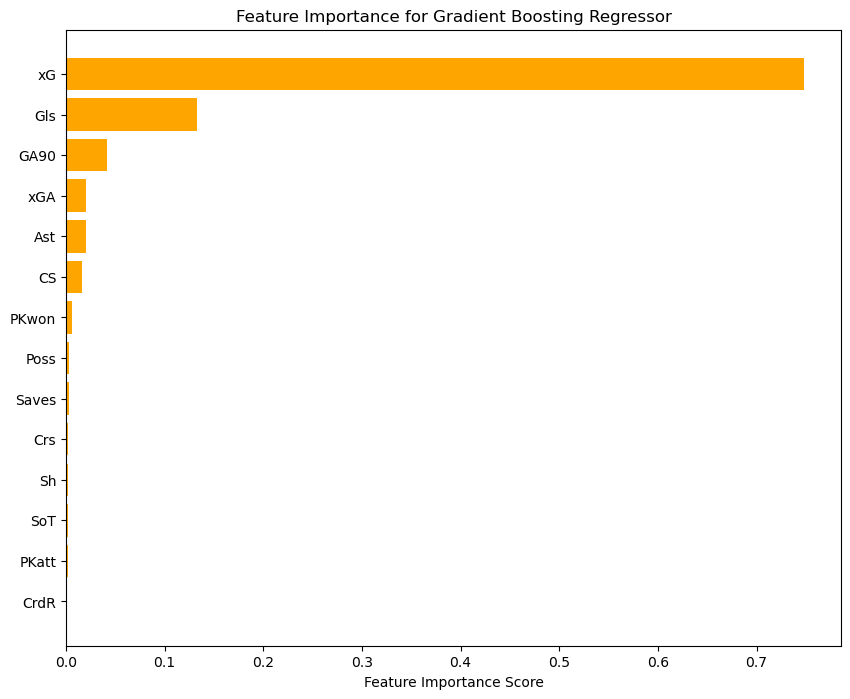

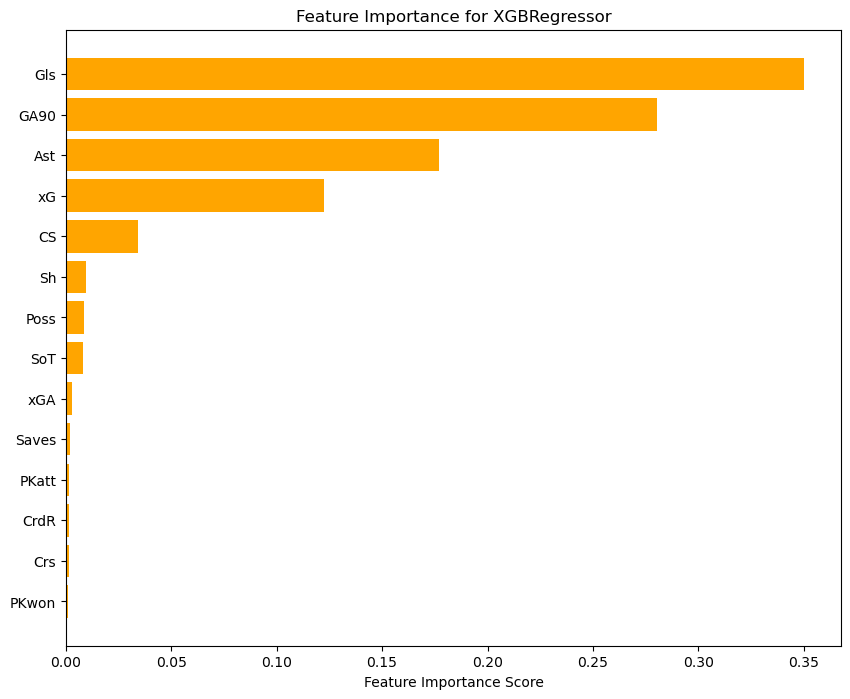

In [298]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# We're assuming that 'X_train', 'y_train', 'X_test', and 'y_test' are already defined in your environment
# The regressor models have been defined above and are assumed to be initialized here as well

# Define the regressor models (without re-initializing since they are assumed to be already defined above)
regressors = [
    ('K Nearest Neighbours', knn),
    ('Decision Tree', dt),
    ('Random Forest', rf),
    ('AdaBoost', ada),
    ('Gradient Boosting Regressor', gbr),
    ('XGBRegressor', xgb)
]

# Empty lists to hold model names, their accuracies, mean squared errors, and feature importances
regressor_names = []
accuracies = []
mses = []
feature_importance_list = []

# Loop through each regressor to train, predict, and calculate accuracy and mean squared error
for regressor_name, regressor in regressors:
    # Train the model
    regressor.fit(X_train, y_train)
  
    # Predict on the test set
    y_pred = regressor.predict(X_test)
  
    # Calculate accuracy and MSE
    accuracy = round(r2_score(y_test, y_pred), 3) * 100
    mse_error = mean_squared_error(y_test, y_pred)
    
    # Append results to the lists
    regressor_names.append(regressor_name)
    accuracies.append(accuracy)
    mses.append(mse_error)
    
    # Feature importance - for models that have this attribute
    if hasattr(regressor, 'feature_importances_'):
        # Get feature importances
        feature_importances = regressor.feature_importances_
        # Create a dictionary of feature names and their importance scores
        feature_importance_dict = dict(zip(X_train.columns, feature_importances))
        # Append the dictionary to the list
        feature_importance_list.append((regressor_name, feature_importance_dict))
    
    # Print results - this would be replaced with logging or plotting in a non-interactive environment
    print(f"{regressor_name} - Accuracy: {accuracy}%, MSE: {mse_error}")

# Now, we plot the feature importances for each model (only for models that provide this attribute)
for name, importance_dict in feature_importance_list:
    # Sort features by importance
    sorted_importances = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)
    features, importances = zip(*sorted_importances)

    # Create horizontal bar plot
    plt.figure(figsize=(10, 8))
    plt.barh(features, importances, color='orange')
    plt.xlabel('Feature Importance Score')
    plt.title(f'Feature Importance for {name}')
    plt.gca().invert_yaxis()  # Display the highest importance at the top
    plt.show()


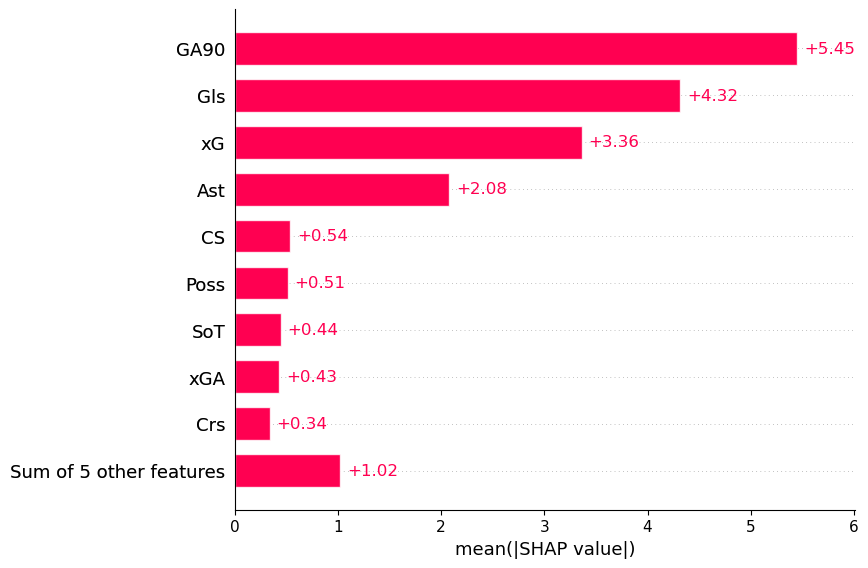

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


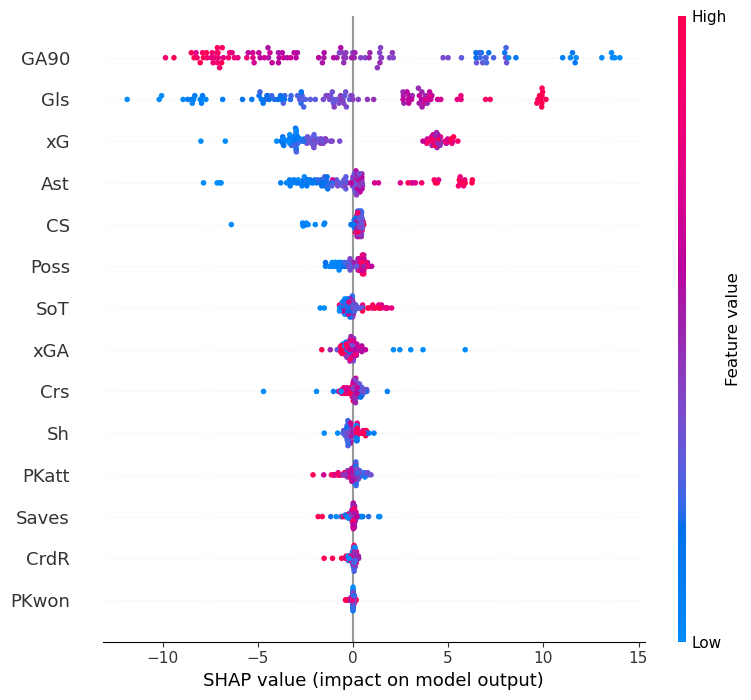

In [300]:
import shap

# Assuming your XGBRegressor model is named 'xgb' and is already trained
# and that 'X_train' is your training data

# Initialize the SHAP explainer with the model and the training data
explainer = shap.Explainer(xgb, X_train)

# Calculate SHAP values for the training data
shap_values = explainer(X_train)

# Plot the SHAP values - the bar plot shows the average impact on model output magnitude
shap.plots.bar(shap_values)

# For a more detailed view, use the summary plot to show how feature values are associated with changes in the output
shap.summary_plot(shap_values, X_train)


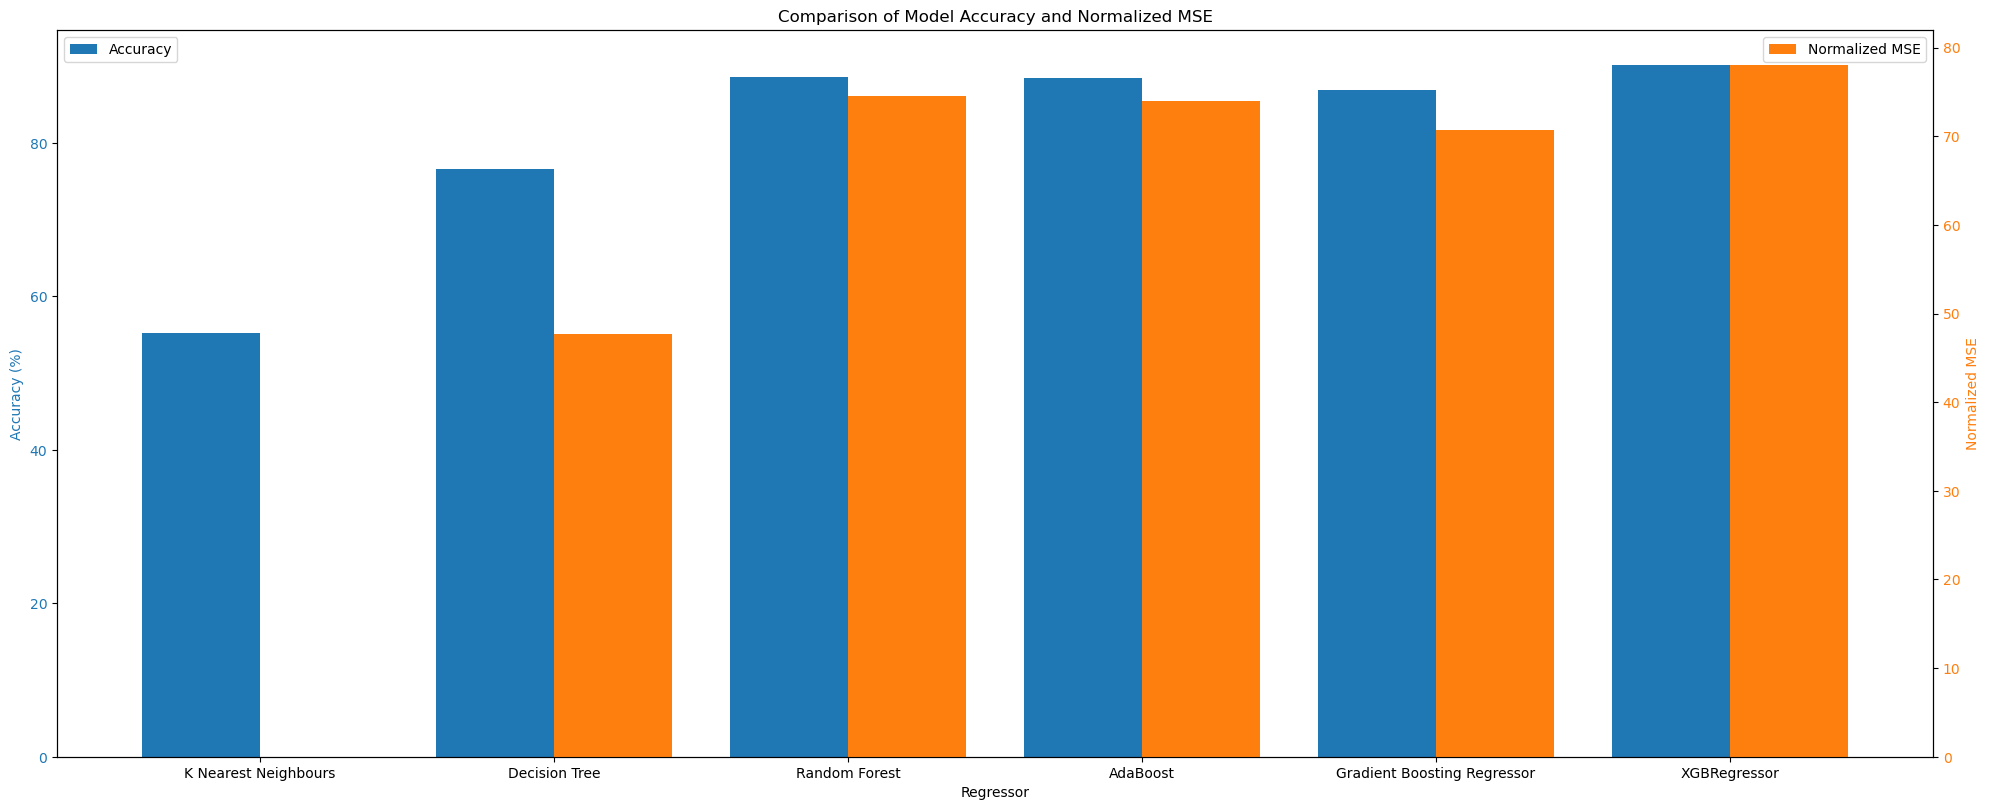

In [243]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these lists with your actual model names and scores
#regressor_names = ['KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
#accuracies = [60, 87, 94, 94, 87]  # Replace with your accuracy scores
#mses = [118, 37, 17, 19, 37]  # Replace with your MSE scores

# Normalize MSE scores to be on the same scale as accuracy for visualization
max_mse = max(mses)
normalized_mses = [100 - (mse / max_mse * 100) for mse in mses]

fig, ax1 = plt.subplots()

ax1.set_xlabel('Regressor')
ax1.set_ylabel('Accuracy (%)', color='tab:blue')
ax1.bar(np.arange(len(regressor_names)) - 0.2, accuracies, 0.4, label='Accuracy', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(np.arange(len(regressor_names)))
ax1.set_xticklabels(regressor_names)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Normalized MSE', color='tab:orange')  # we already handled the x-label with ax1
ax2.bar(np.arange(len(regressor_names)) + 0.2, normalized_mses, 0.4, label='Normalized MSE', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper right')

fig.tight_layout()  # to make sure layout is neat
plt.title('Comparison of Model Accuracy and Normalized MSE')
plt.show()


In [9]:
# Current table
dd_2023=set_columns(df_2023)
#print(df_2023.head())
dd_2023.columns.to_list()

['Team',
 'Pts',
 'Season',
 'Rk',
 'xG',
 'xGA',
 'Poss',
 'Gls',
 'Ast',
 'Sh',
 'SoT',
 'GA90',
 'Saves',
 'CS',
 'PKatt',
 'CrdR',
 'Pts/MP',
 'Crs',
 'PKwon']

In [11]:
seas23_test=dd_2023.drop(['Pts','Season','Team','Pts/MP','Rk'],axis=1)
print(seas23_test.columns.to_list())


['xG', 'xGA', 'Poss', 'Gls', 'Ast', 'Sh', 'SoT', 'GA90', 'Saves', 'CS', 'PKatt', 'CrdR', 'Crs', 'PKwon']


In [262]:
x1_test=seas23_test
y1_test=dd_2023['Pts']

K Nearest Neighbours R2: 45%, MSE: 128
Decision Tree R2: 69%, MSE: 72


Random Forest R2: 75%, MSE: 57
AdaBoost R2: 72%, MSE: 64
Gradient Boosting Regressor R2: 79%, MSE: 48
XGBRegressor R2: 84%, MSE: 37


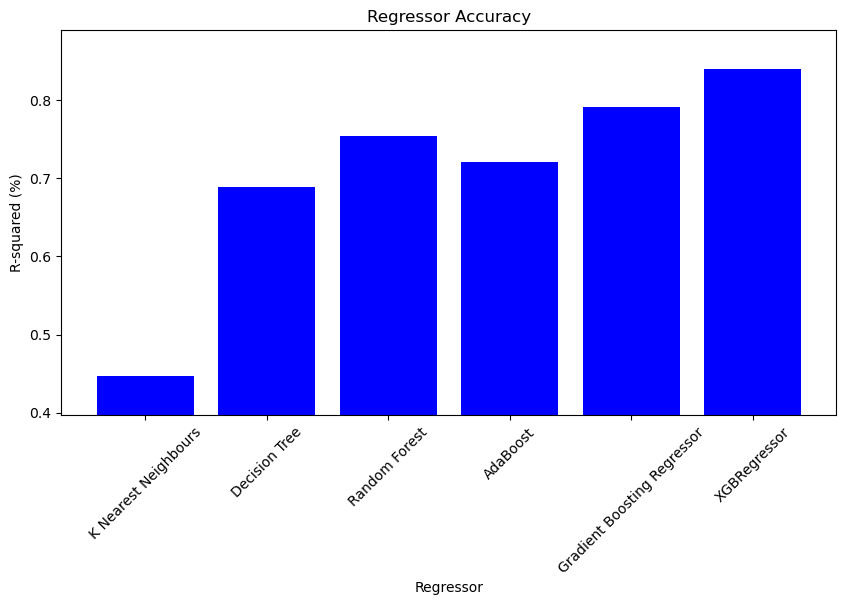

In [263]:
import matplotlib.pyplot as plt

# Assuming regressors is a list of tuples with (name, regressor object)
regressor_names = []
r2_scores = []
mses = []

for regressor_name, regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(x1_test)
    
    r2 = round(r2_score(y1_test, y_pred), 3)
    mse = mean_squared_error(y1_test, y_pred)
    
    regressor_names.append(regressor_name)
    r2_scores.append(r2)
    mses.append(mse)
    
    print(f'{regressor_name} R2: {r2*100:.0f}%, MSE: {mse:.0f}')

# Plotting the bar chart
plt.figure(figsize=(10, 5))  # Size of the figure
plt.bar(regressor_names, r2_scores, color='blue')  # Bar chart
#plt.bar(regressor_names, mses, color='Green')  # Bar chart
plt.xlabel('Regressor')
plt.ylabel('R-squared (%)')
plt.title('Regressor Accuracy')
plt.xticks(rotation=45)  # Rotate the model names to avoid overlap and improve readability
plt.ylim([min(r2_scores) - 0.05, max(r2_scores) + 0.05])  # Set y-axis limits to give some space above and below the bars
plt.show()



K Nearest Neighbours R2: 55%, MSE: 132
Decision Tree R2: 77%, MSE: 69
Random Forest R2: 88%, MSE: 34
AdaBoost R2: 88%, MSE: 34
Gradient Boosting Regressor R2: 86%, MSE: 41
XGBRegressor R2: 90%, MSE: 29


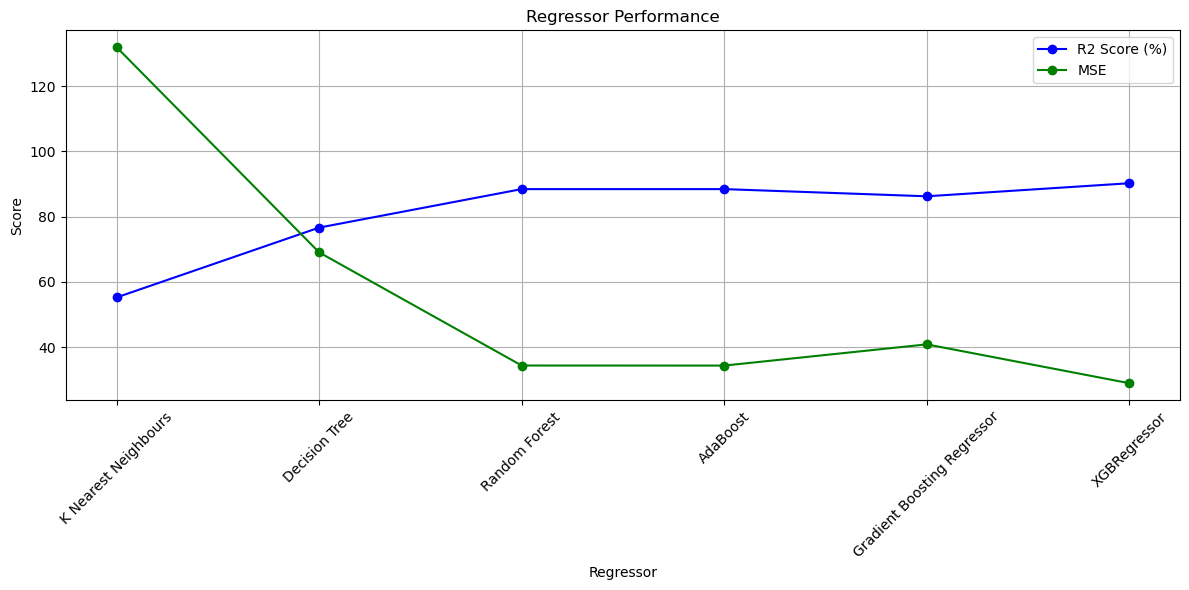

In [264]:
import matplotlib.pyplot as plt

# Assuming 'regressors' is a list of tuples with (name, regressor object)
regressor_names = []
r2_scores = []
mses = []

for regressor_name, regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)  # Ensure you use X_test and y_test
    
    r2 = round(r2_score(y_test, y_pred), 3) * 100  # Convert R2 score to percentage for consistency
    mse = mean_squared_error(y_test, y_pred)
    
    regressor_names.append(regressor_name)
    r2_scores.append(r2)
    mses.append(mse)
    
    print(f'{regressor_name} R2: {r2:.0f}%, MSE: {mse:.0f}')

# Plotting the line graph
plt.figure(figsize=(12, 6))  # Size of the figure
plt.plot(regressor_names, r2_scores, marker='o', linestyle='-', color='blue', label='R2 Score (%)')  # Line for R2 scores
plt.plot(regressor_names, mses, marker='o', linestyle='-', color='green', label='MSE')  # Line for MSE scores

plt.xlabel('Regressor')
plt.ylabel('Score')
plt.title('Regressor Performance')
plt.xticks(rotation=45)  # Rotate the model names to avoid overlap and improve readability
plt.legend()  # Add a legend to distinguish the lines
plt.grid(True)  # Add a grid for easier readability of values
plt.tight_layout()  # Adjust layout
plt.show()


In [265]:
import pandas as pd

# Assuming 'regressors' is a list of tuples with (name, regressor object), and that X_train, y_train, X_test, y_test are defined
regressor_names = []
r2_scores = []
mses = []

for regressor_name, regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(x1_test)
    
    r2 = round(r2_score(y1_test, y_pred), 3) * 100  # Convert R2 score to percentage
    mse = mean_squared_error(y1_test, y_pred)
    
    regressor_names.append(regressor_name)
    r2_scores.append(r2)  # Storing the R2 score percentage
    mses.append(mse)
    
    print(f'{regressor_name} R2: {r2:.0f}%, MSE: {mse:.0f}')

# Create a DataFrame from the collected data
performance_table = pd.DataFrame({
    'Regressor': regressor_names,
    'R2 Score (%)': r2_scores,
    'MSE': mses
})

# Display the DataFrame as a table
print(performance_table)

# Optionally, you can save this table to a CSV file
#performance_table.to_csv('regressor_performance.csv', index=False)


K Nearest Neighbours R2: 45%, MSE: 128
Decision Tree R2: 66%, MSE: 79
Random Forest R2: 73%, MSE: 62
AdaBoost R2: 70%, MSE: 68
Gradient Boosting Regressor R2: 79%, MSE: 48
XGBRegressor R2: 84%, MSE: 37
                     Regressor  R2 Score (%)         MSE
0         K Nearest Neighbours          44.7  127.626563
1                Decision Tree          65.9   78.848248
2                Random Forest          73.3   61.692970
3                     AdaBoost          70.5   68.008008
4  Gradient Boosting Regressor          79.4   47.662454
5                 XGBRegressor          84.0   37.004287


In [266]:
# Assuming X and seas23_test are two pandas DataFrames you want to compare
# This code will check if both dataframes have the same features

# List of features in both dataframes
features_X = X.columns.tolist()
features_seas23_test = seas23_test.columns.tolist()

# Set operations to find common and different features
common_features = set(features_X).intersection(features_seas23_test)
different_features_X = set(features_X).difference(features_seas23_test)
different_features_seas23_test = set(features_seas23_test).difference(features_X)

# Output the findings
print("Common features in both dataframes:", common_features)
print("Features in X not in seas23_test:", different_features_X)
print("Features in seas23_test not in X:", different_features_seas23_test)

# Check if both dataframes have exactly the same features
if features_X == features_seas23_test:
    print("Both dataframes have exactly the same features.")
else:
    print("The dataframes have different features.")


Common features in both dataframes: {'GA90', 'PKatt', 'Poss', 'Gls', 'CrdR', 'Saves', 'xG', 'SoT', 'xGA', 'CS', 'PKwon', 'Sh', 'Crs', 'Ast'}
Features in X not in seas23_test: set()
Features in seas23_test not in X: set()
Both dataframes have exactly the same features.


In [271]:
seas23_copy=dd_2023
for regressor_name, regressor in regressors:
    
    y_pred = regressor.predict(seas23_test)
    seas23_copy[regressor_name]=y_pred
    #average points per match
    seas23_copy[f"{regressor_name} PPg"]=y_pred/38

/var/folders/dh/v6353kv55rn7p4tknjfkwfk40000gn/T/ipykernel_59148/27904438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seas23_copy[regressor_name]=y_pred
/var/folders/dh/v6353kv55rn7p4tknjfkwfk40000gn/T/ipykernel_59148/27904438.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seas23_copy[f"{regressor_name} PPg"]=y_pred/38
/var/folders/dh/v6353kv55rn7p4tknjfkwfk40000gn/T/ipykernel_59148/27904438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [272]:
#seas23_copy.drop(['Pts/MP','xG','xGA','Poss','Gls','Ast','PK','PKatt','CrdR','GA90','SoTA','Saves','CS','PKsv','PKm','Sh','SoT','Sh/90','G/Sh','G/SoT','Crs','OG'],axis=1,inplace=True)
seas23_copy.drop(['Pts/MP','xG','xGA','Poss','Gls','Ast','PKatt','CrdR','GA90','Saves','CS','Sh','SoT','Crs','PKwon','Rk','Pts','Season'],axis=1,inplace=True)

KeyError: "['Pts/MP', 'xG', 'xGA', 'Poss', 'Gls', 'Ast', 'PKatt', 'CrdR', 'GA90', 'Saves', 'CS', 'Sh', 'SoT', 'Crs', 'PKwon', 'Rk'] not found in axis"

In [273]:
seas23_copy

,Team,Pts,Season,K Nearest Neighbours,K Nearest Neighbours PPg,Decision Tree,Decision Tree PPg,Random Forest,Random Forest PPg,AdaBoost,AdaBoost PPg,Gradient Boosting Regressor,Gradient Boosting Regressor PPg,XGBRegressor,XGBRegressor PPg
0,Arsenal,64,2023-24,52.375,1.378289,81.000000,2.131579,72.35,1.903947,68.454545,1.801435,68.446057,1.801212,76.795296,2.020929
1,Liverpool,64,2023-24,68.375,1.799342,65.000000,1.710526,69.33,1.824474,67.421053,1.774238,63.885160,1.681188,65.253639,1.717201
2,Manchester City,63,2023-24,60.500,1.592105,70.857143,1.864662,71.16,1.872632,68.652174,1.806636,72.817115,1.916240,69.721138,1.834767
3,Aston Villa,56,2023-24,48.125,1.266447,48.000000,1.263158,57.71,1.518684,59.000000,1.552632,51.147840,1.345996,52.781662,1.388991
4,Tottenham,53,2023-24,46.500,1.223684,48.000000,1.263158,57.14,1.503684,57.928571,1.524436,50.159681,1.319992,43.722256,1.150586
5,Manchester Utd,47,2023-24,42.750,1.125000,40.352941,1.061920,43.93,1.156053,42.806452,1.126486,43.786327,1.152272,41.063328,1.080614
6,West Ham,44,2023-24,37.000,0.973684,40.352941,1.061920,39.56,1.041053,39.588235,1.041796,41.877263,1.102033,36.683609,0.965358
7,Brighton,42,2023-24,43.750,1.151316,40.352941,1.061920,45.73,1.203421,47.173913,1.241419,43.180320,1.136324,32.711082,0.860818
8,Wolves,41,2023-24,37.000,0.973684,40.352941,1.061920,41.33,1.087632,40.950000,1.077632,41.590446,1.094485,34.591045,0.910291
9,Newcastle Utd,40,2023-24,42.750,1.125000,34.000000,0.894737,54.04,1.422105,53.000000,1.394737,43.095354,1.134088,40.599957,1.068420


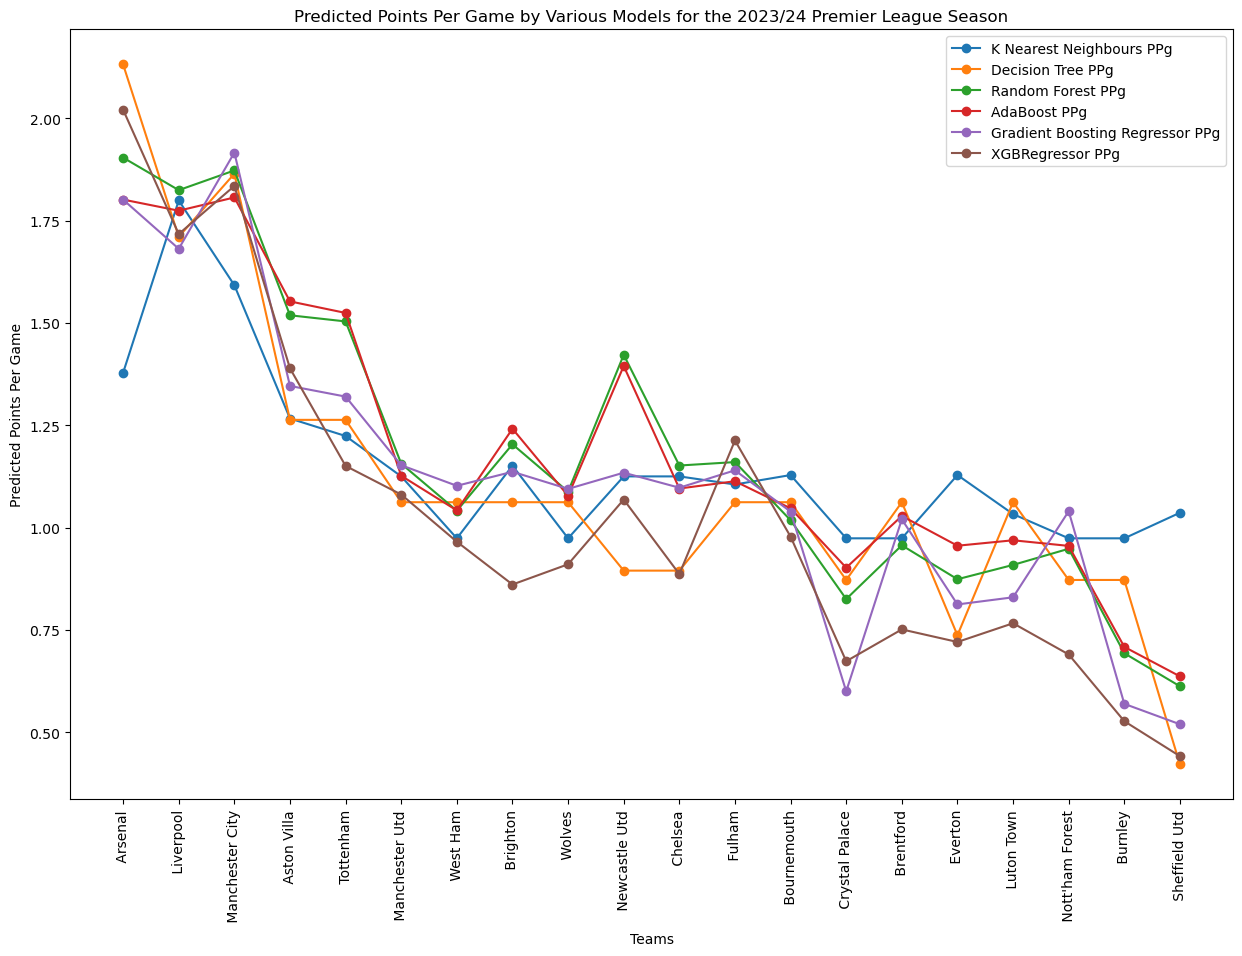

In [275]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df_predictions' is your DataFrame containing the predictions and actual data
df_predictions = dd_2023  # Replace with your actual path

plt.figure(figsize=(15, 10))
for column in df_predictions.columns[3:]:  # Skipping 'Team', 'Pts', and 'Season' columns
    if "PPg" in column:  # We want to plot only the PPg columns
        plt.plot(df_predictions['Team'], df_predictions[column], marker='o', label=column)
plt.xticks(rotation=90)  # Rotate team names for better readability
plt.xlabel('Teams')
plt.ylabel('Predicted Points Per Game')
plt.title('Predicted Points Per Game by Various Models for the 2023/24 Premier League Season')
plt.legend()
plt.show()


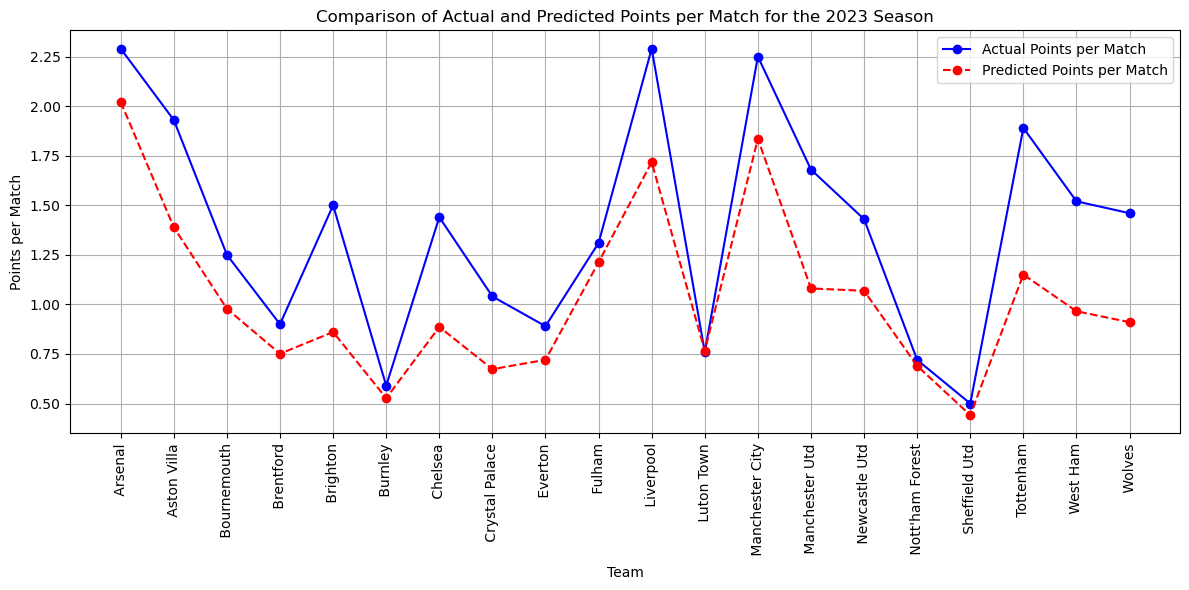

In [279]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dd_2023' and 'seas23_copy' are already loaded pandas DataFrames
# Make sure both dataframes have a 'Team' column that you can merge on

# Merging the data on 'Team' to align the actual and predicted points per match
merged_data = pd.merge(dd_2023[['Team', 'Pts/MP']], seas23_copy[['Team', 'XGBRegressor PPg']], on='Team', how='inner')

# Sorting by team names to ensure the graph's continuity
merged_data.sort_values('Team', inplace=True)

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Team'], merged_data['Pts/MP'], label='Actual Points per Match', marker='o', color='blue')
plt.plot(merged_data['Team'], merged_data['XGBRegressor PPg'], label='Predicted Points per Match', marker='o', linestyle='--', color='red')
plt.xlabel('Team')
plt.ylabel('Points per Match')
plt.title('Comparison of Actual and Predicted Points per Match for the 2023 Season')
plt.xticks(rotation=90)  # Rotate team names for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout
plt.show()


In [280]:
# I will provide you with a code snippet that should do what you described.
# You need to replace the column names with the actual column names in your DataFrame if they are different.
# Please adjust 'RegressorsNamesHere' with the actual regressor names you used earlier.

# Calculate the remaining points based on the points per match (PPg) predicted by each regressor for the remaining matches
remaining_matches = 10
seas23_copy['RemainingPts'] = seas23_copy['XGBRegressor PPg'] * remaining_matches
#seas23_copy['RemainingPts'] = seas23_copy['AdaBoost PPg'] * remaining_matches
# Add the remaining points to the current points
seas23_copy['PredictedFinalPts'] = seas23_copy['Pts'] + seas23_copy['RemainingPts']

# Selecting only the required columns
final_table = seas23_copy[['Team', 'Season', 'PredictedFinalPts']]

# Sorting the teams based on the predicted final points in descending order (for ascending order, set ascending=True)
final_table_sorted = final_table.sort_values(by='PredictedFinalPts', ascending=False)

# Adding a rank column based on the sorted points
final_table_sorted['Rank'] = range(1, len(final_table_sorted) + 1)

# Display the final predicted table
final_table_sorted
#seas23_copy



/var/folders/dh/v6353kv55rn7p4tknjfkwfk40000gn/T/ipykernel_59148/3462337176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seas23_copy['RemainingPts'] = seas23_copy['XGBRegressor PPg'] * remaining_matches
/var/folders/dh/v6353kv55rn7p4tknjfkwfk40000gn/T/ipykernel_59148/3462337176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seas23_copy['PredictedFinalPts'] = seas23_copy['Pts'] + seas23_copy['RemainingPts']


,Team,Season,PredictedFinalPts,Rank
0,Arsenal,2023-24,84.209290,1
2,Manchester City,2023-24,81.347668,2
1,Liverpool,2023-24,81.172010,3
3,Aston Villa,2023-24,69.889912,4
4,Tottenham,2023-24,64.505857,5
5,Manchester Utd,2023-24,57.806139,6
6,West Ham,2023-24,53.653582,7
9,Newcastle Utd,2023-24,50.684199,8
7,Brighton,2023-24,50.608180,9
11,Fulham,2023-24,50.127843,10


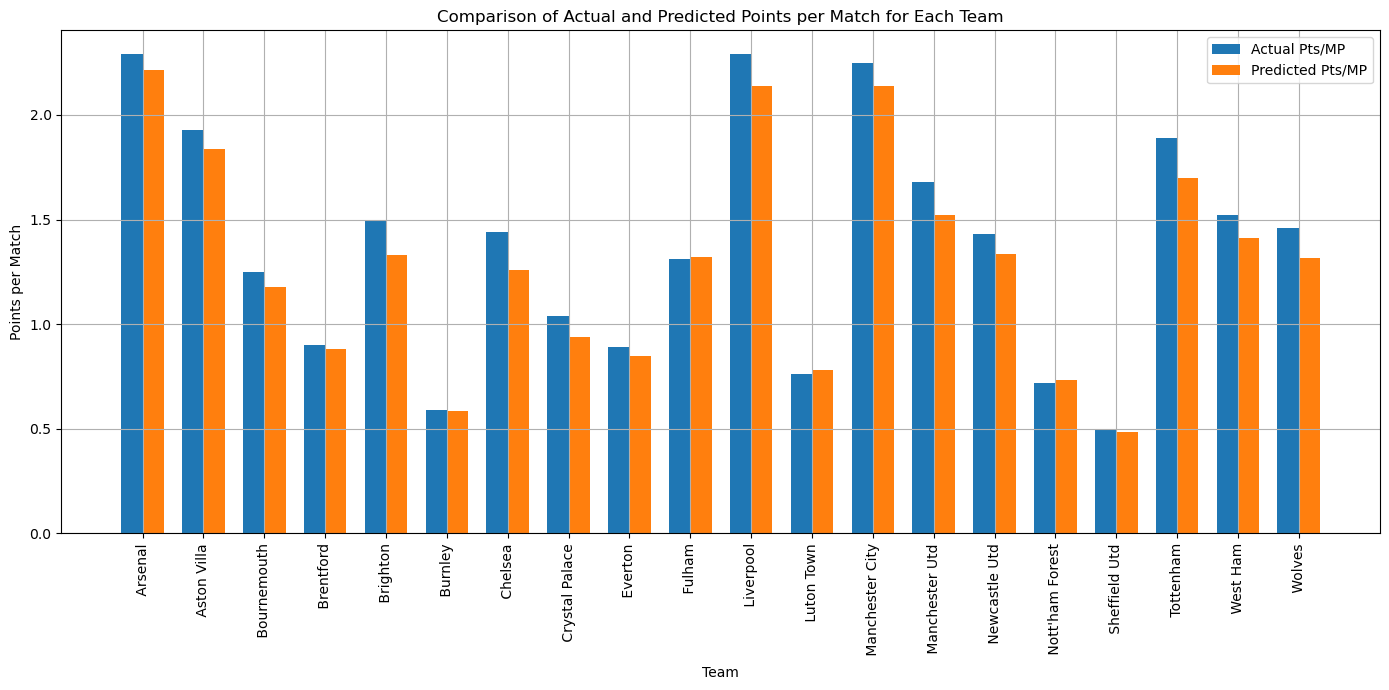

In [285]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dd_2023' and 'final_table_sorted' are pandas DataFrames and have been merged or contain the same teams

# Prepare data
merged_data = pd.merge(dd_2023[['Team', 'Pts/MP']], final_table_sorted[['Team', 'Pts/MP']], on='Team', how='inner', suffixes=('_Actual', '_Predicted'))
merged_data.sort_values('Team', inplace=True)  # Optional: Sort by team names

# Setting index to 'Team' for better chart labels
merged_data.set_index('Team', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))  # Adjust size to fit all team names comfortably

# Define bar width
bar_width = 0.35

# Numerical range for the number of teams
index = range(len(merged_data))

# Plotting both actual and predicted points per match
bars1 = ax.bar(index, merged_data['Pts/MP_Actual'], bar_width, label='Actual Pts/MP')
bars2 = ax.bar([p + bar_width for p in index], merged_data['Pts/MP_Predicted'], bar_width, label='Predicted Pts/MP')

# Add some useful info
ax.set_xlabel('Team')
ax.set_ylabel('Points per Match')
ax.set_title('Comparison of Actual and Predicted Points per Match for Each Team')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(merged_data.index)
plt.xticks(rotation=90)  # Rotate names for better readability
ax.legend()

# Optional: Customize the grid
ax.grid(True)

# Show plot
plt.tight_layout()  # Adjust layout to make sure everything fits without clipping
plt.show()


In [283]:
# Styling the final_table_sorted for better visual representation in reports
styled_table = final_table_sorted.style.background_gradient(cmap='viridis')\
    .set_caption("Predicted Final Points and Ranks for the 2023/24 Season")\
    .set_properties(**{'text-align': 'center'})\
    .bar(subset=['PredictedFinalPts'], color='#5fba7d')\
    .highlight_max(subset=['PredictedFinalPts'], color='lightgreen', axis=0)\
    .highlight_min(subset=['PredictedFinalPts'], color='salmon', axis=0)

# Display the styled DataFrame
styled_table


,Team,Season,PredictedFinalPts,Rank,Pts/MP
0,Arsenal,2023-24,84.209290,1,2.216034
2,Manchester City,2023-24,81.347668,2,2.140728
1,Liverpool,2023-24,81.172010,3,2.136106
3,Aston Villa,2023-24,69.889912,4,1.839208
4,Tottenham,2023-24,64.505857,5,1.697523
5,Manchester Utd,2023-24,57.806139,6,1.521214
6,West Ham,2023-24,53.653582,7,1.411936
9,Newcastle Utd,2023-24,50.684199,8,1.333795
7,Brighton,2023-24,50.608180,9,1.331794
11,Fulham,2023-24,50.127843,10,1.319154


In [293]:
import pandas as pd

# Assuming 'final_table_sorted' is your DataFrame, and 'Rank' is the column of interest

# Reorder the columns so that 'Rank' comes first
columns_order = ['Rank', 'Team', 'Season', 'PredictedFinalPts']
final_table_sorted = final_table_sorted[columns_order]

# Function to apply custom styles for better visual contrast and highlighting
def highlight_rank(row):
    if row['Rank'] <= 5:
        return ['background-color: #4CAF50']*len(row)  # Green for top 5 teams
    elif row['Rank'] > len(final_table_sorted) - 3:
        return ['background-color: #FFCDD2']*len(row)  # Red for bottom 3 teams
    else:
        return ['background-color: #f7f7f7']*len(row)  # Light grey for others

# Styling the DataFrame
styled_final_table = (
    final_table_sorted.style
    .apply(highlight_rank, axis=1)
    .set_table_styles(
        [{
            'selector': 'th',
            'props': [
                ('background-color', '#3f3f3f'),  # Dark grey header
                ('color', 'white'),  # White text in header
                ('text-align', 'center')
            ]
        }]
    )
    .set_properties(**{
        'color': 'black',  # Text color for the table
        'border-color': 'black',  # Border color
        'border-style': 'solid',  # Border style
        'border-width': '1px',  # Border width
        'text-align': 'center'  # Text alignment
    })
    .background_gradient(subset=['PredictedFinalPts'], cmap='viridis')  # Gradient on predicted points
)

# Display the styled DataFrame
styled_final_table


,Rank,Team,Season,PredictedFinalPts
0,1,Arsenal,2023-24,84.209290
2,2,Manchester City,2023-24,81.347668
1,3,Liverpool,2023-24,81.172010
3,4,Aston Villa,2023-24,69.889912
4,5,Tottenham,2023-24,64.505857
5,6,Manchester Utd,2023-24,57.806139
6,7,West Ham,2023-24,53.653582
9,8,Newcastle Utd,2023-24,50.684199
7,9,Brighton,2023-24,50.608180
11,10,Fulham,2023-24,50.127843


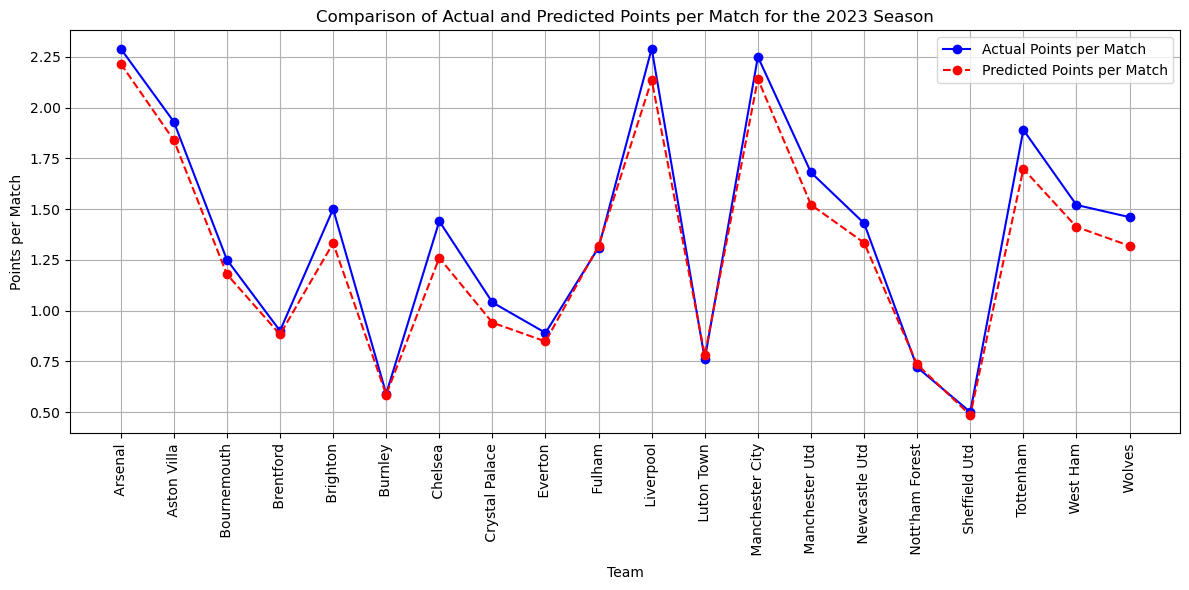

In [281]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'final_table_sorted' has a column 'PredictedFinalPts'
# Creating a new column 'Pts/MP' which is the predicted points per match
final_table_sorted['Pts/MP'] = final_table_sorted['PredictedFinalPts'] / 38

# Assuming 'dd_2023' is already loaded and has columns 'Team' and 'Pts/MP'
# Merge the data on 'Team' to align the actual and predicted points per match
merged_data = pd.merge(dd_2023[['Team', 'Pts/MP']], final_table_sorted[['Team', 'Pts/MP']], on='Team', how='inner', suffixes=('_Actual', '_Predicted'))

# Sorting by team names to ensure the graph's continuity
merged_data.sort_values('Team', inplace=True)

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Team'], merged_data['Pts/MP_Actual'], label='Actual Points per Match', marker='o', color='blue')
plt.plot(merged_data['Team'], merged_data['Pts/MP_Predicted'], label='Predicted Points per Match', marker='o', linestyle='--', color='red')
plt.xlabel('Team')
plt.ylabel('Points per Match')
plt.title('Comparison of Actual and Predicted Points per Match for the 2023 Season')
plt.xticks(rotation=90)  # Rotate team names for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout
plt.show()
